In [1]:
#Control
import json
import os
import sys
import glob
import subprocess

#Ploting
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as tick
rcParams['text.usetex'] = False
rcParams['lines.linewidth'] = 0.5
rcParams['font.size'] = 16

# Processing
import numpy as np
from statsmodels.tsa.stattools import adfuller

# For tabulating
import pandas as pd


# Import own modules
from time_series_data import time_series_data_c
from time_series_plotter import time_series_plotter_c

Using UQit in: /scratch/adperez/neko/examples/rbc_RA1e8/post_process/TimeSeries/../UQ/UQit_ts_module/UQit-ts/


# Read the data

In [2]:
files = sorted(glob.glob("*original.txt*"))
for i in range(0,len(files)):
    print("File "+repr(i) +" is: "+ files[i].strip())

data = []
for i in range(0,len(files)):
    dat = np.loadtxt(files[i].strip())
    data.append(dat)

File 0 is: 30001-rbc_RA1e8_nelv500k_original.txt
File 1 is: 30002-rbc_RA1e9_nelv500k_original.txt
File 2 is: 30003-rbc_RA1e10_nelv500k_original.txt
File 3 is: 30004-rbc_RA1e11_nelv500k_original.txt
File 4 is: 30005-rbc_RA1e12_nelv6m_original.txt
File 5 is: 30006-rbc_RA1e13_nelv6m_original.txt
File 6 is: 30007-rbc_RA1e14_nelv30m_original.txt
File 7 is: 30008-rbc_RA1e15_nelv30m_original.txt


# Initialize the relevant objects

In [3]:
i = 0
time_series =[]
ts_dict = {}


for dat in data:
    ts = time_series_data_c(dat)
    time_series.append(ts)

    # Check if this rayleigh number is already in the dictionary
    key = ts_dict.get(ts.Ra[0])
    if key is None: ts_dict[ts.Ra[0]] = [] 
    ts_dict[ts.Ra[0]].append(ts)
    

ts_plt = time_series_plotter_c()

# Plot all the time series independently

In [4]:
#check_these_rayleigh = [1e13]
check_these_rayleigh = list(ts_dict.keys())

## Check the stationarity of the signals

In [5]:
how_many_intervals = 10 # To divide the series for the adf_test

#for which_ra in ts_dict.keys():
for which_ra in check_these_rayleigh:

    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:
    
        # See where the transient is over
        ts.get_transients(int(len(ts.t)/how_many_intervals))

------ Now calculating for Ra = 100000000.0---------------


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:01<00:00,  1.10it/s]


------ Now calculating for Ra = 1000000000.0---------------


 14%|████████████████████████▏                                                                                                                                                | 1/7 [00:02<00:16,  2.83s/it]


------ Now calculating for Ra = 10000000000.0---------------


 12%|█████████████████████▏                                                                                                                                                   | 1/8 [00:03<00:24,  3.50s/it]


------ Now calculating for Ra = 100000000000.0---------------


 17%|████████████████████████████▏                                                                                                                                            | 1/6 [00:01<00:07,  1.55s/it]


------ Now calculating for Ra = 1000000000000.0---------------


 11%|██████████████████▊                                                                                                                                                      | 1/9 [00:00<00:02,  3.18it/s]


------ Now calculating for Ra = 10000000000000.0---------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.45s/it]


------ Now calculating for Ra = 100000000000000.0---------------


 45%|████████████████████████████████████████████████████████████████████████████▎                                                                                           | 5/11 [00:01<00:01,  3.21it/s]


------ Now calculating for Ra = 1000000000000000.0---------------


  9%|███████████████▎                                                                                                                                                        | 1/11 [00:00<00:01,  6.86it/s]


## Plot the time series

True


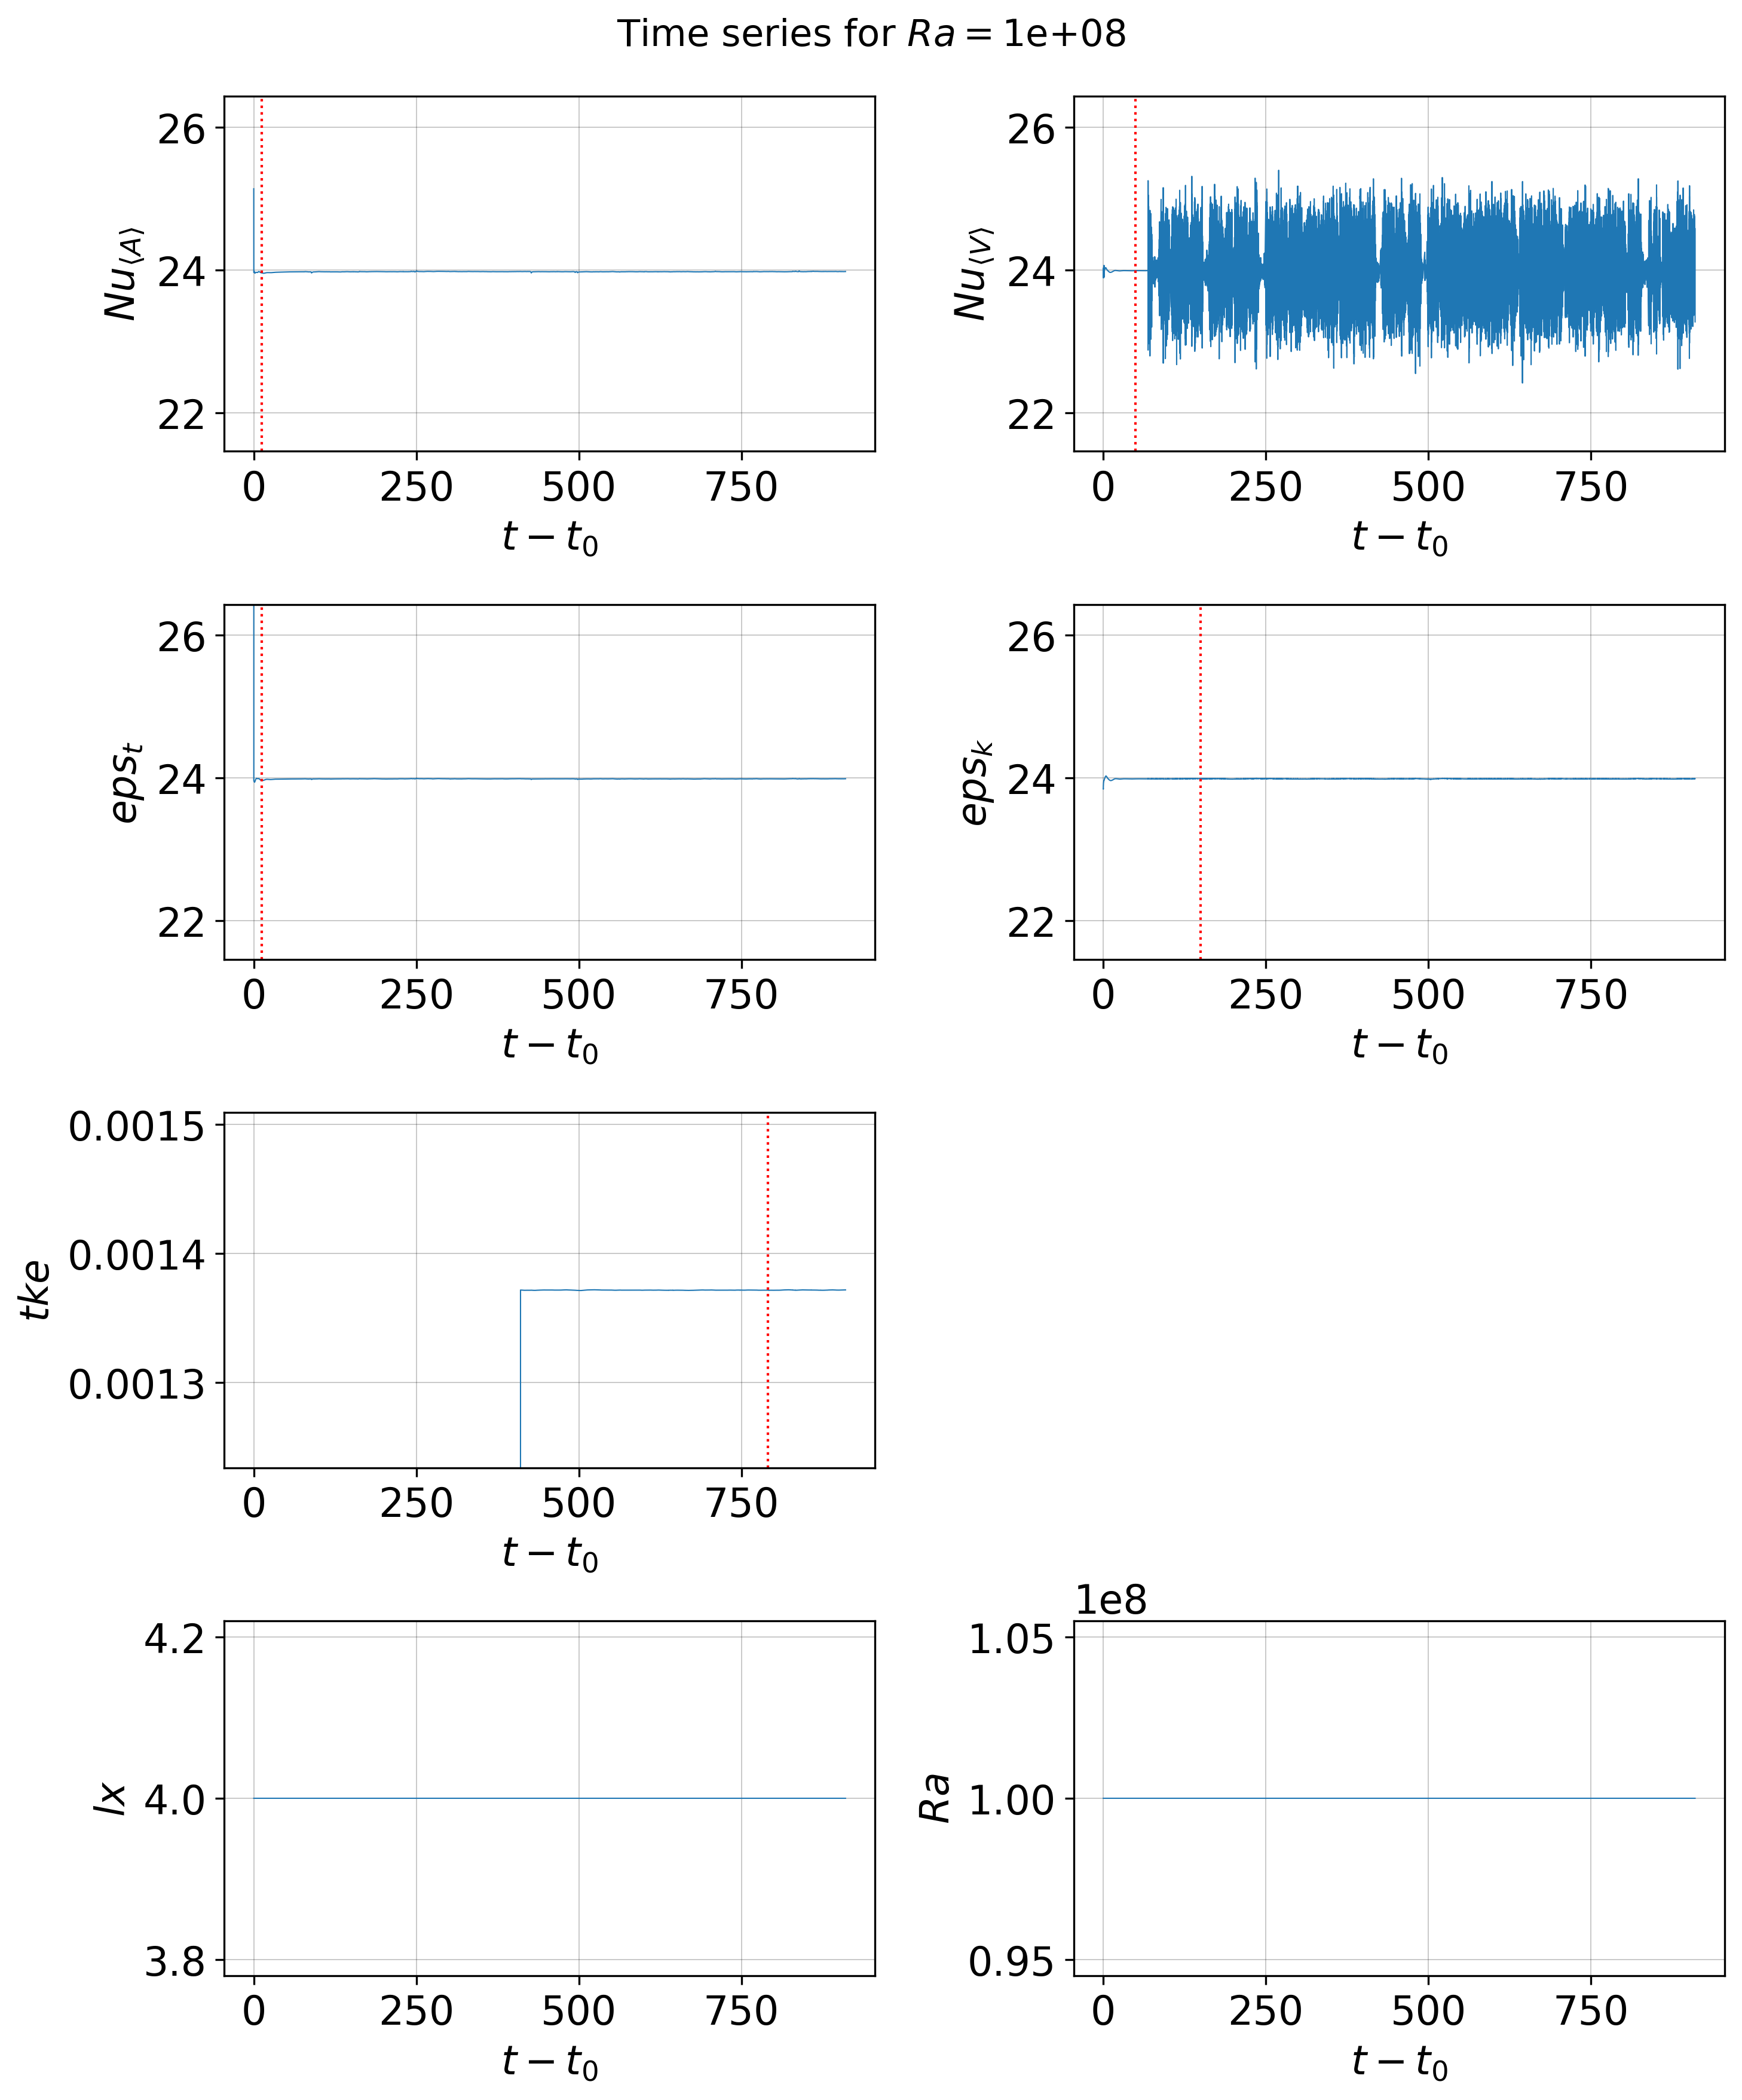

True


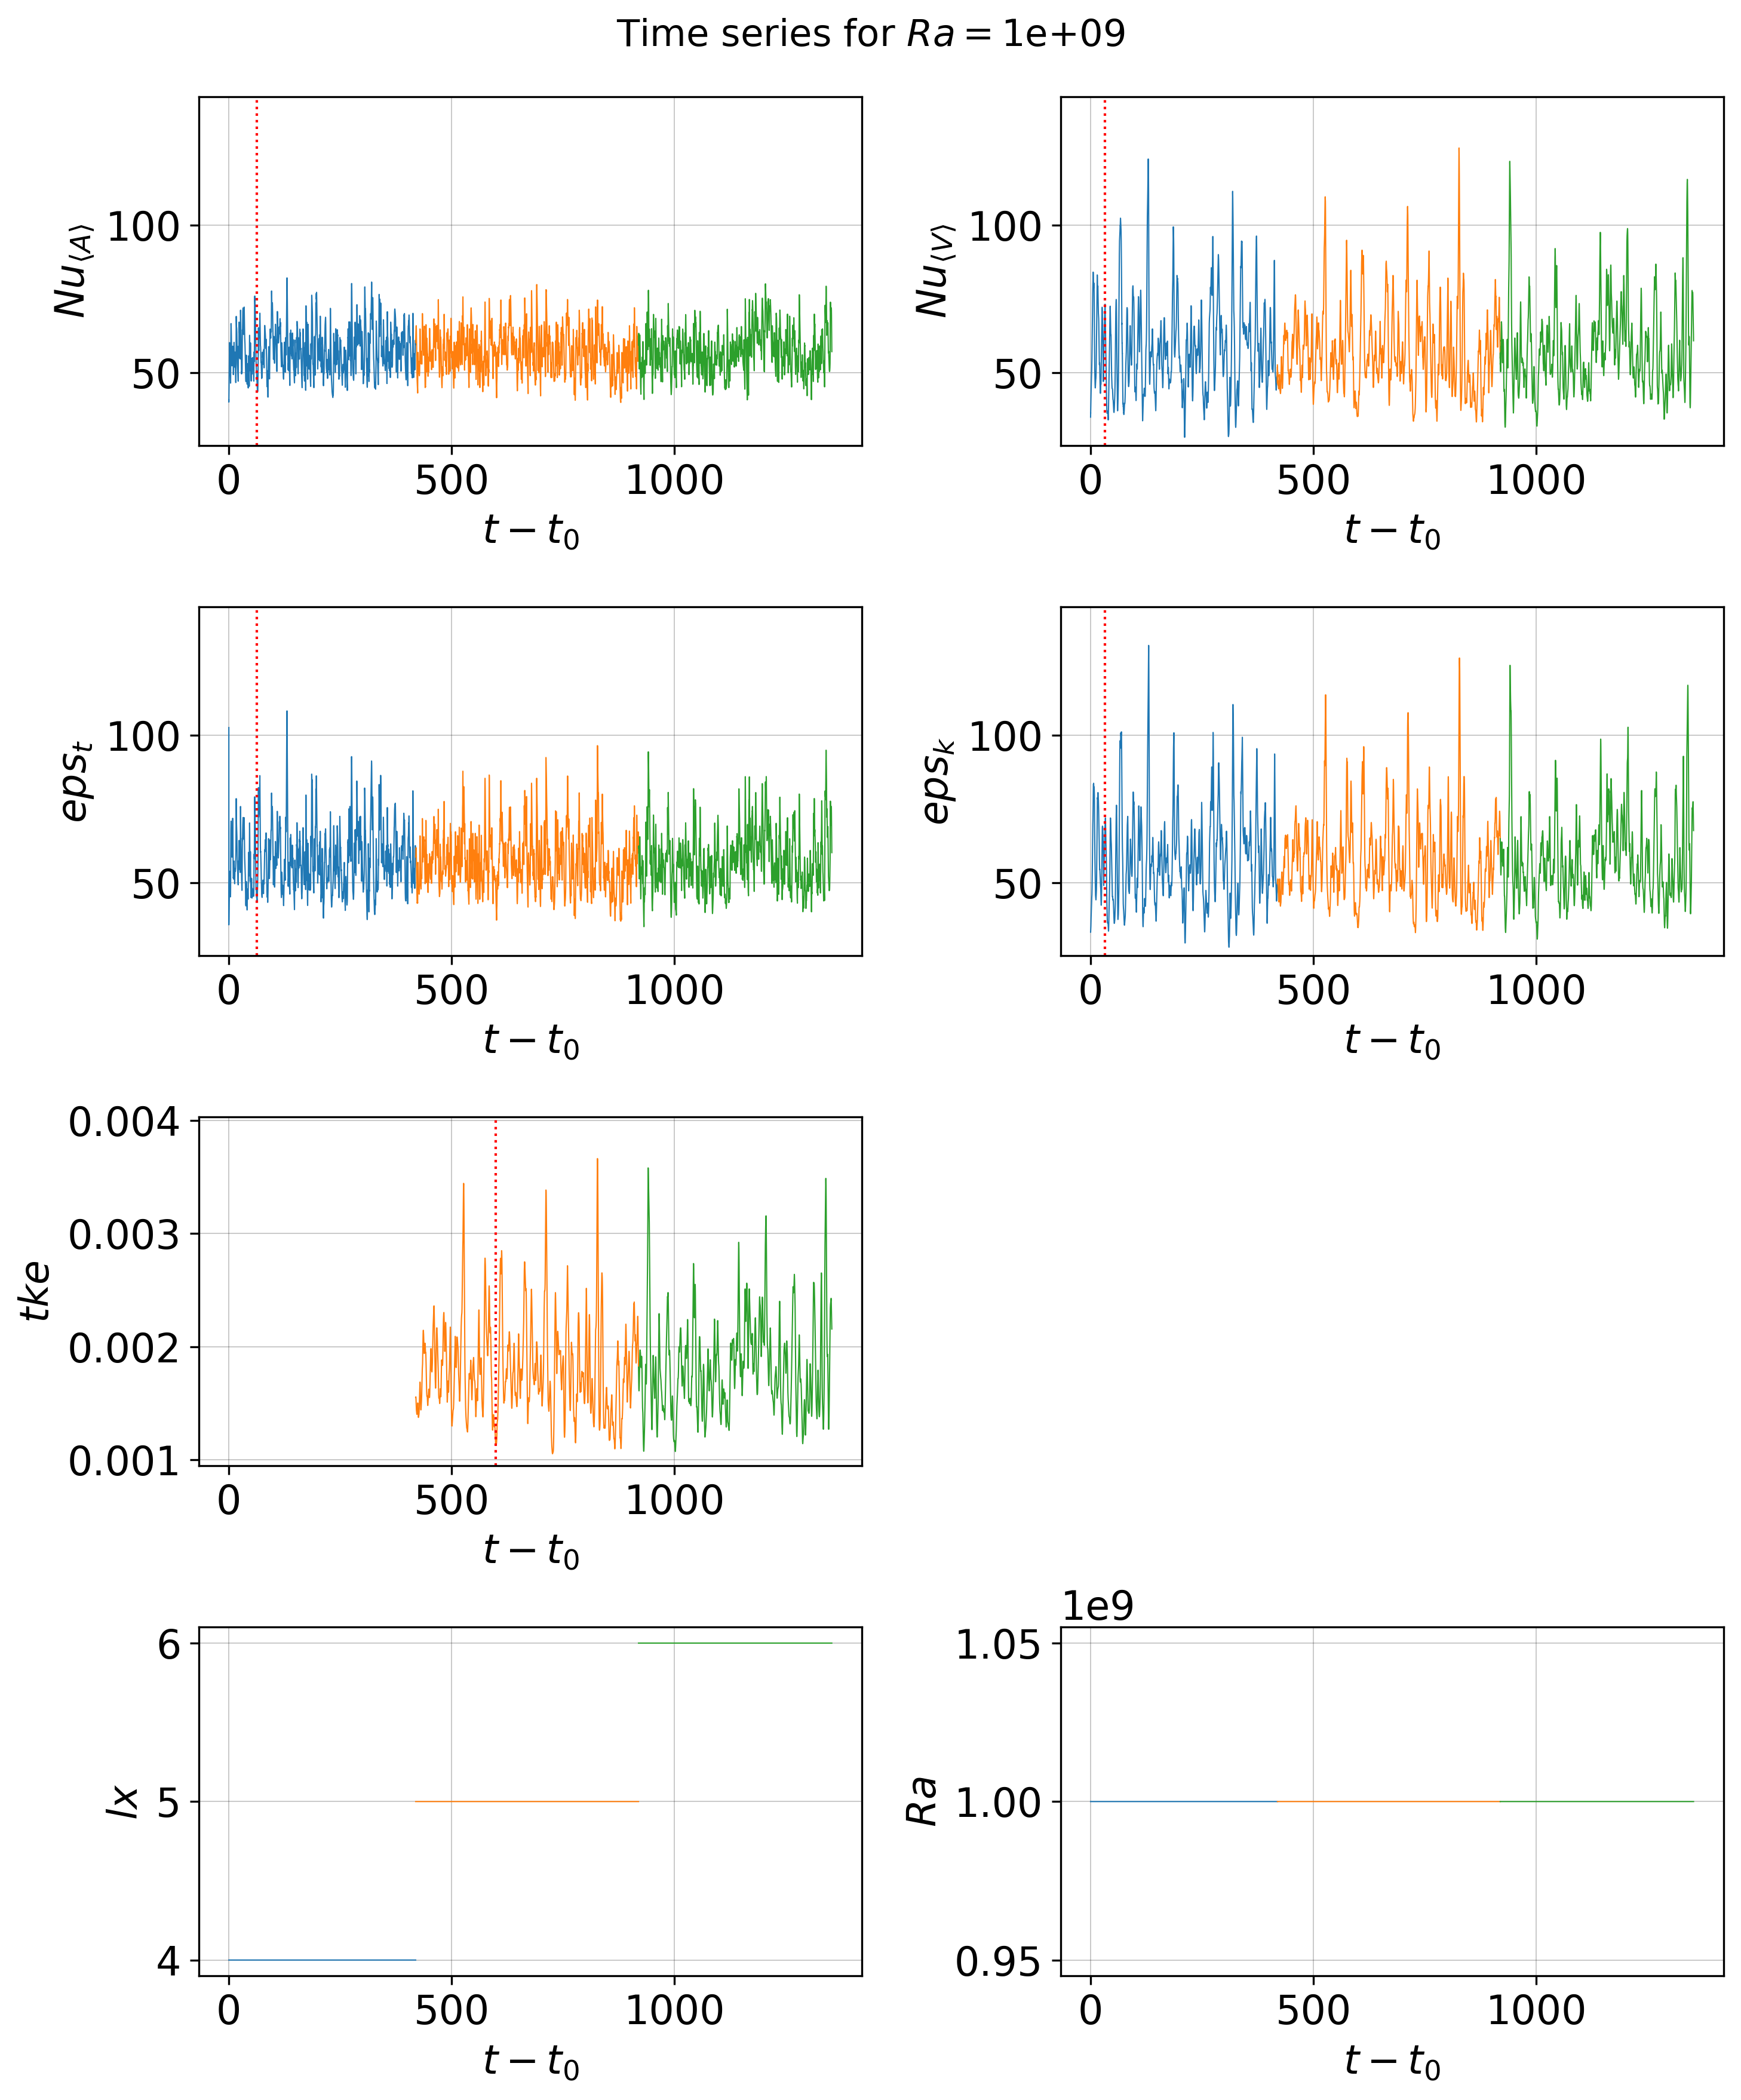

True


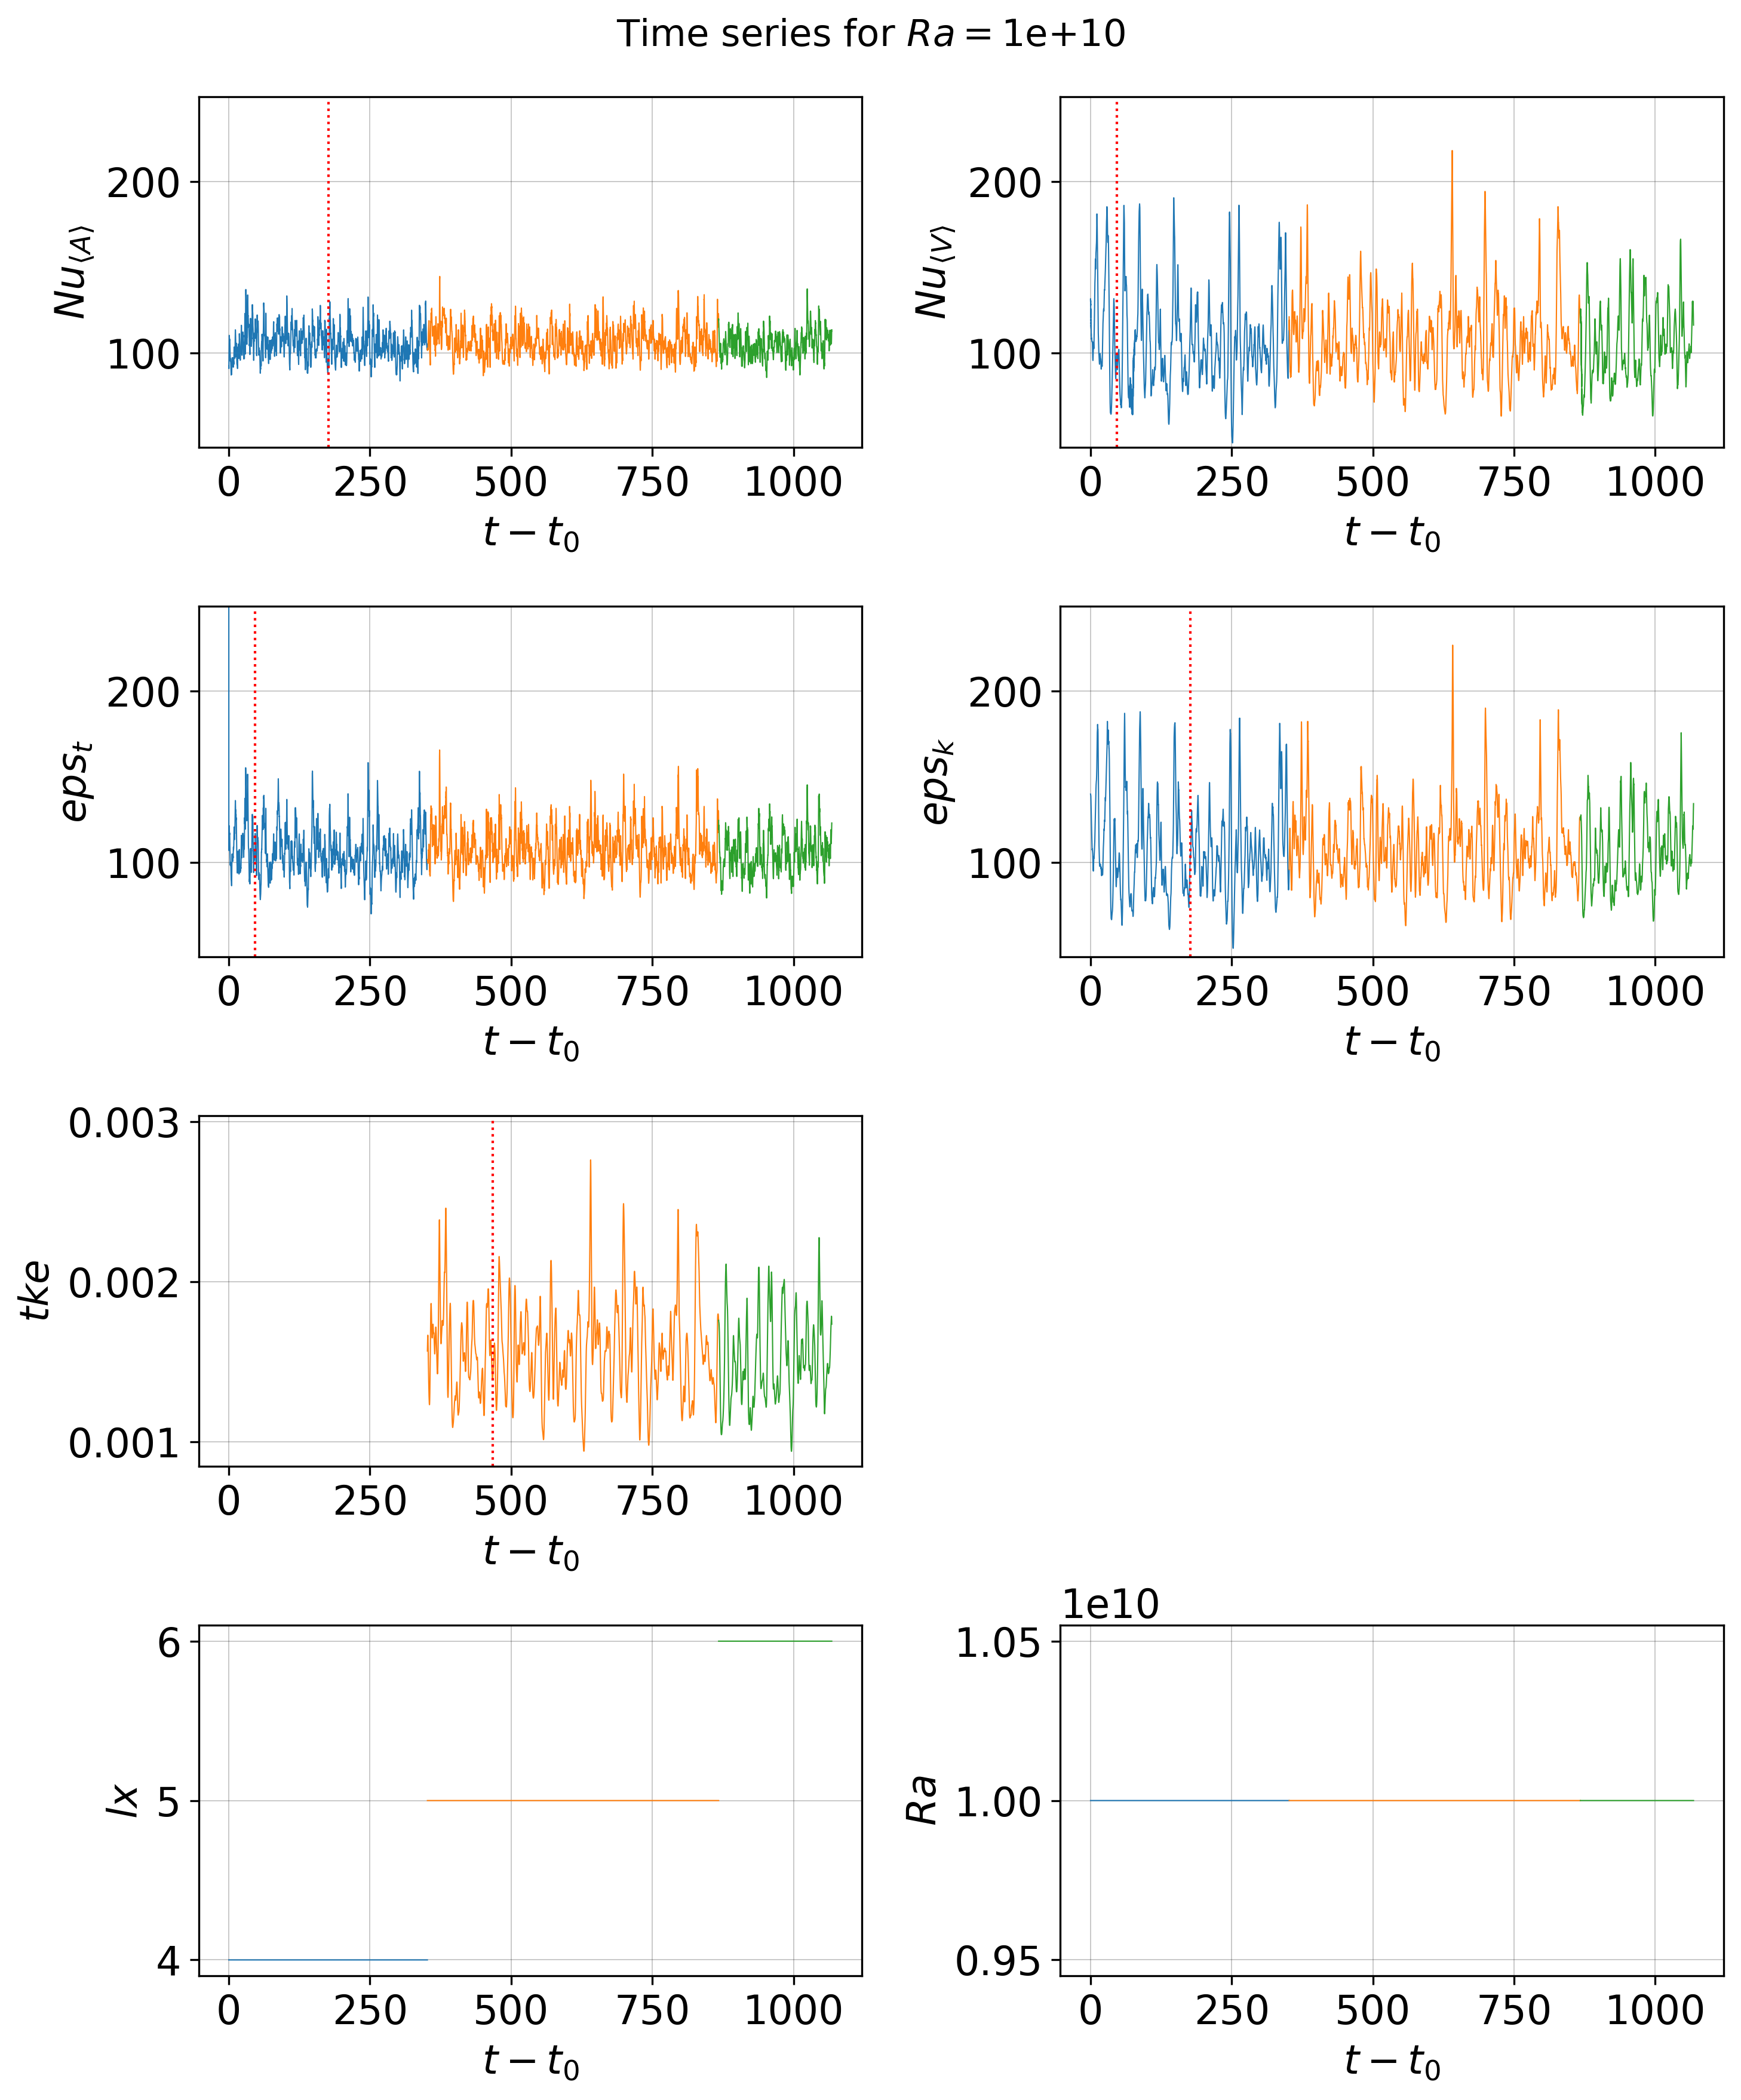

True


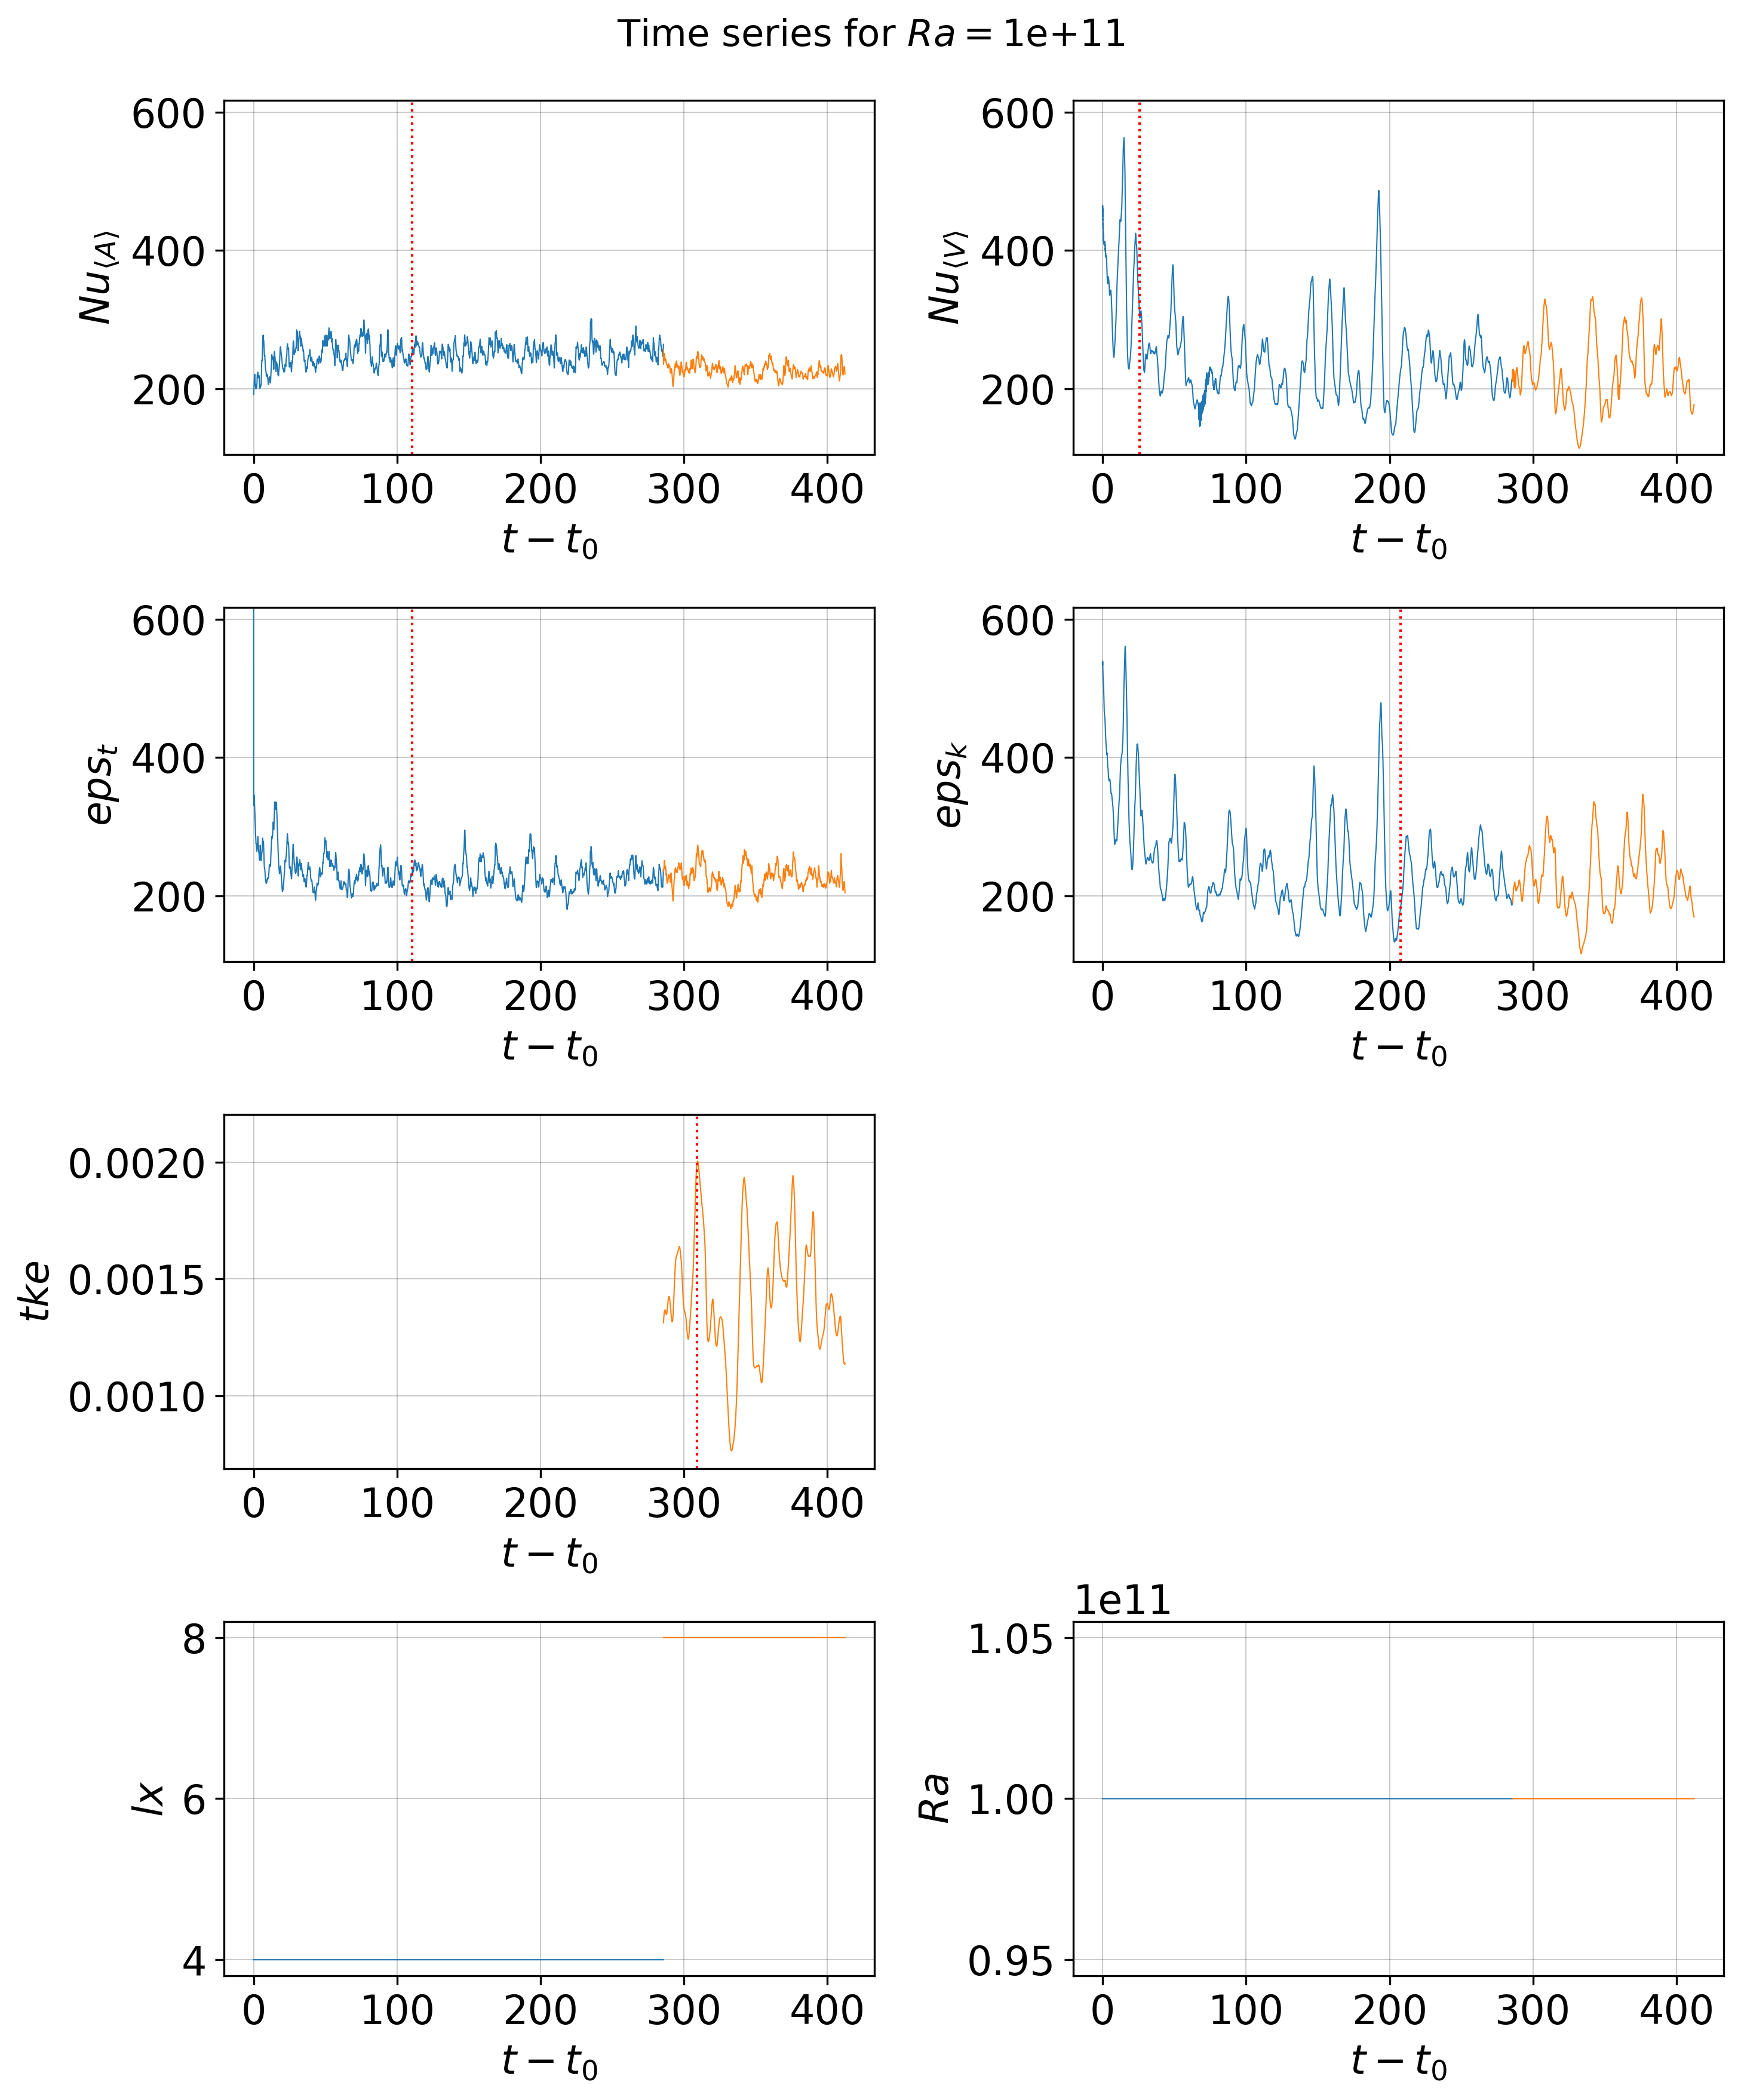

True


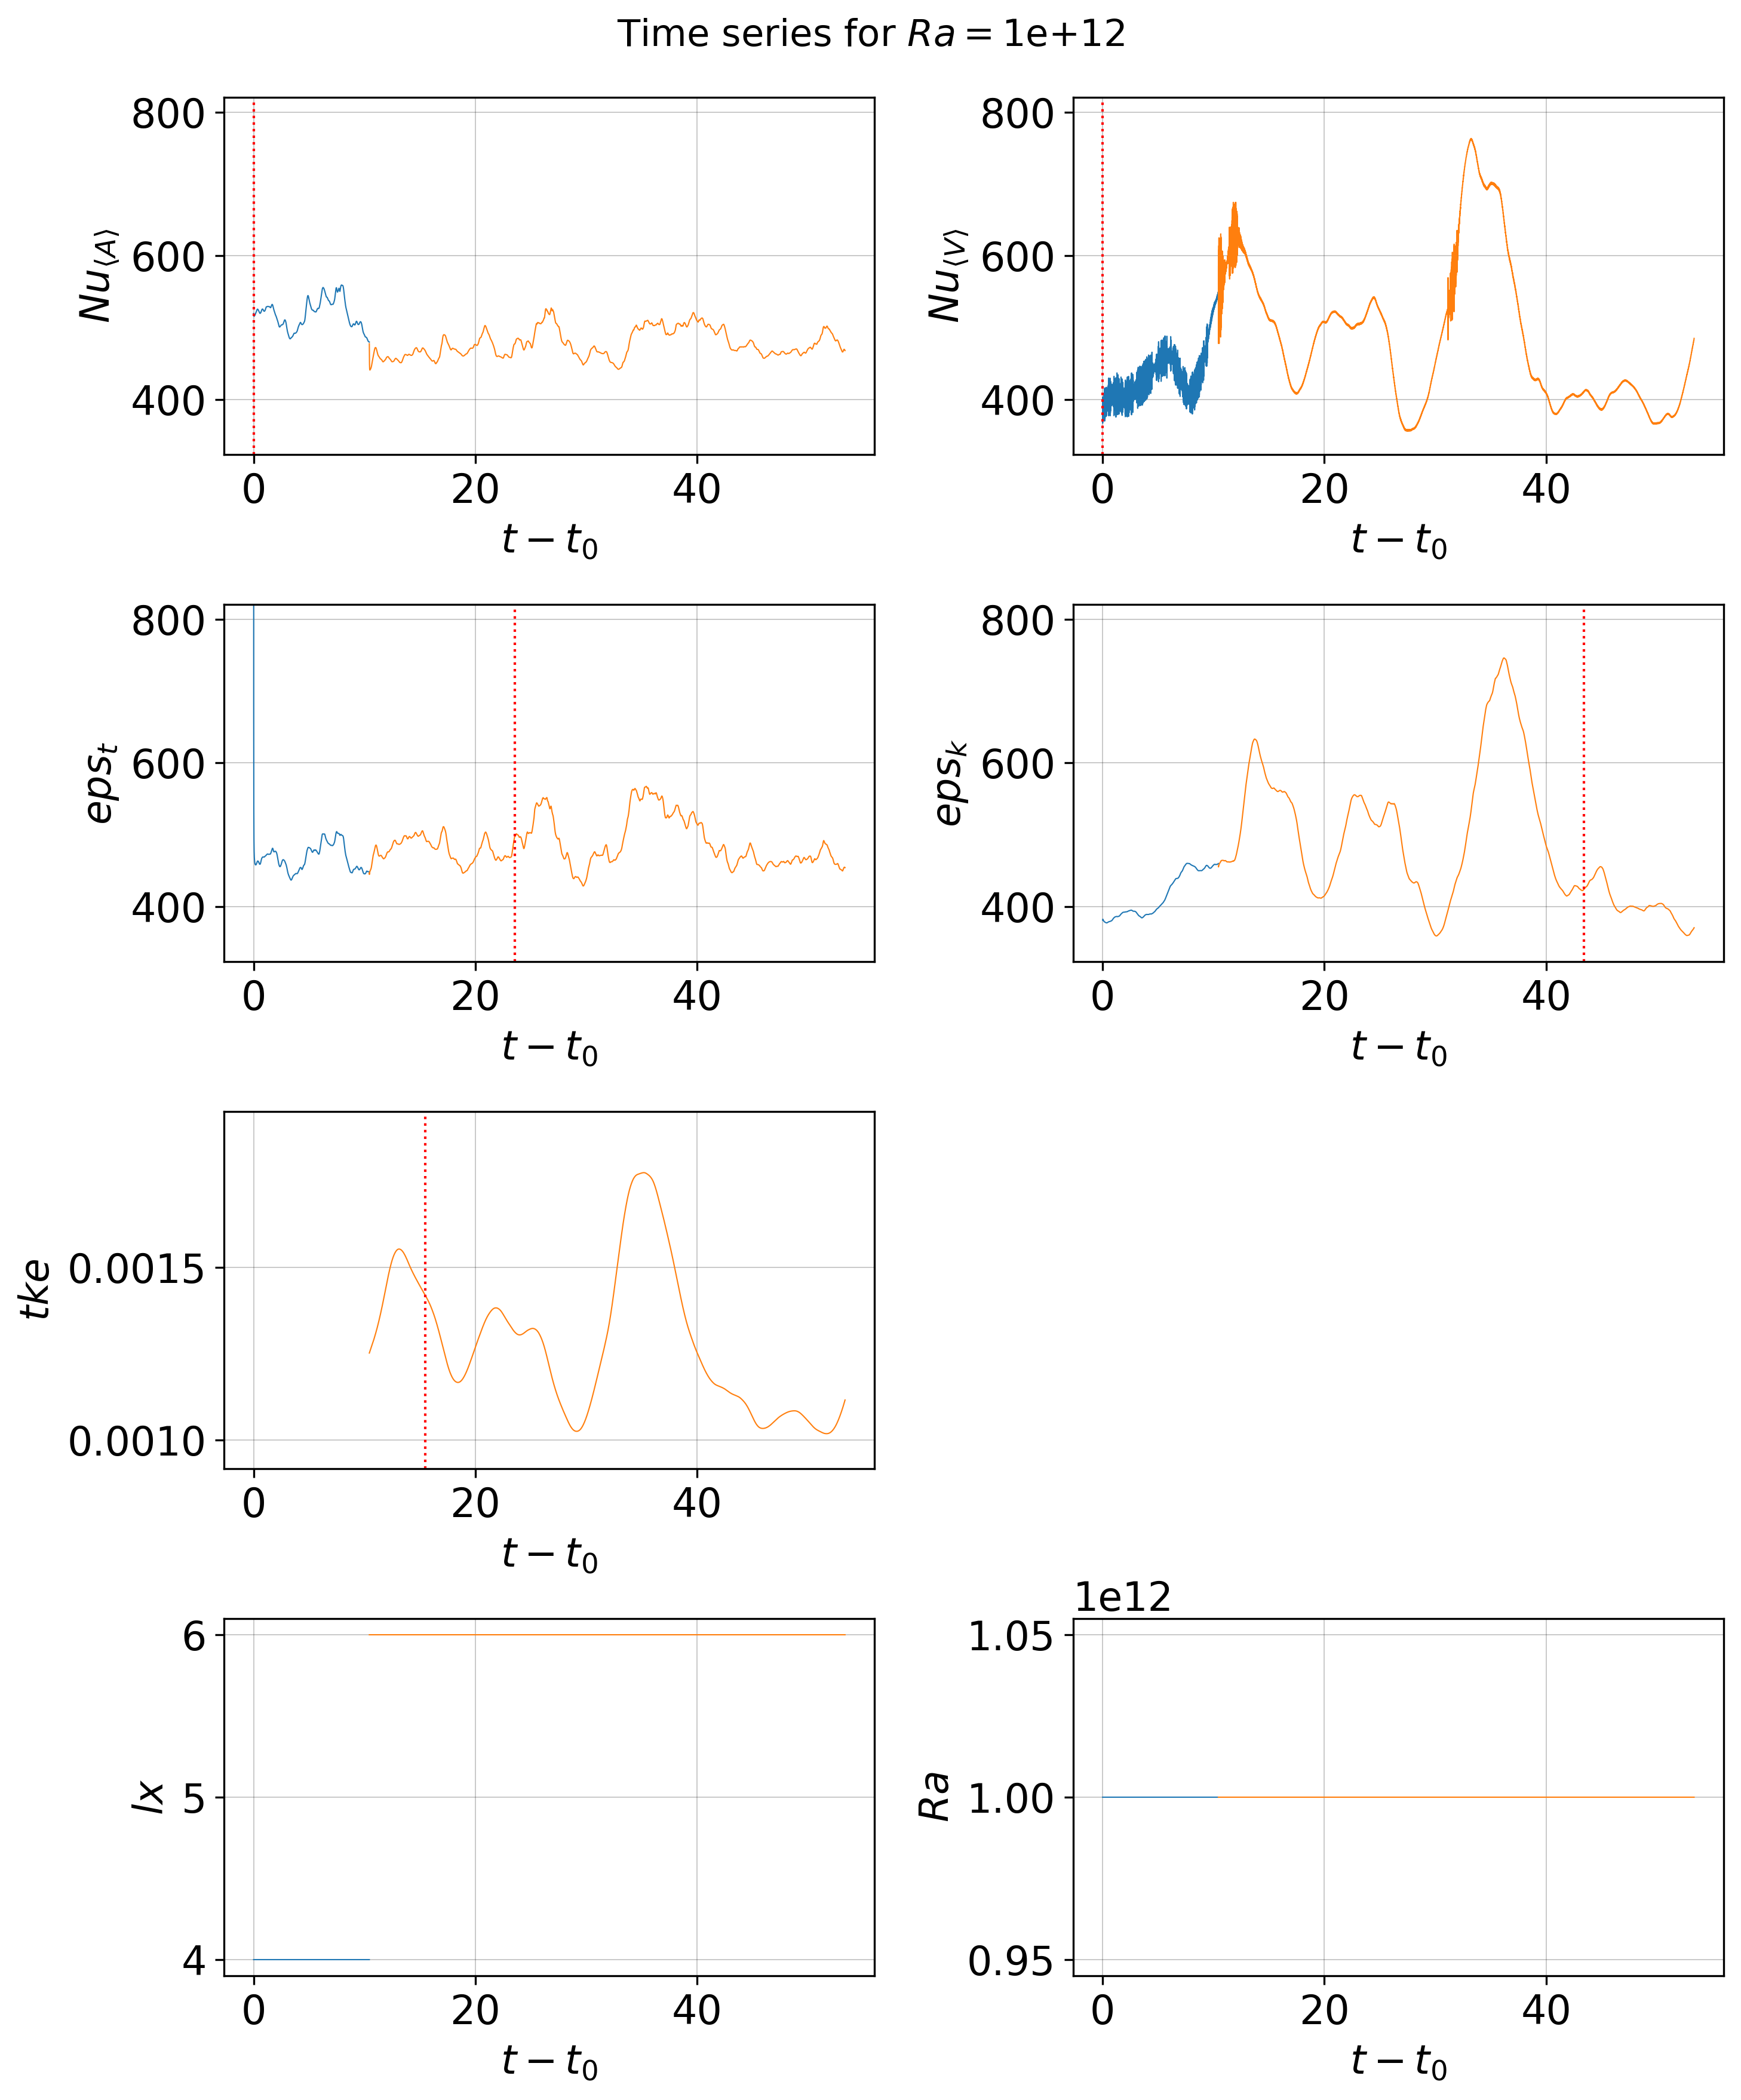

True


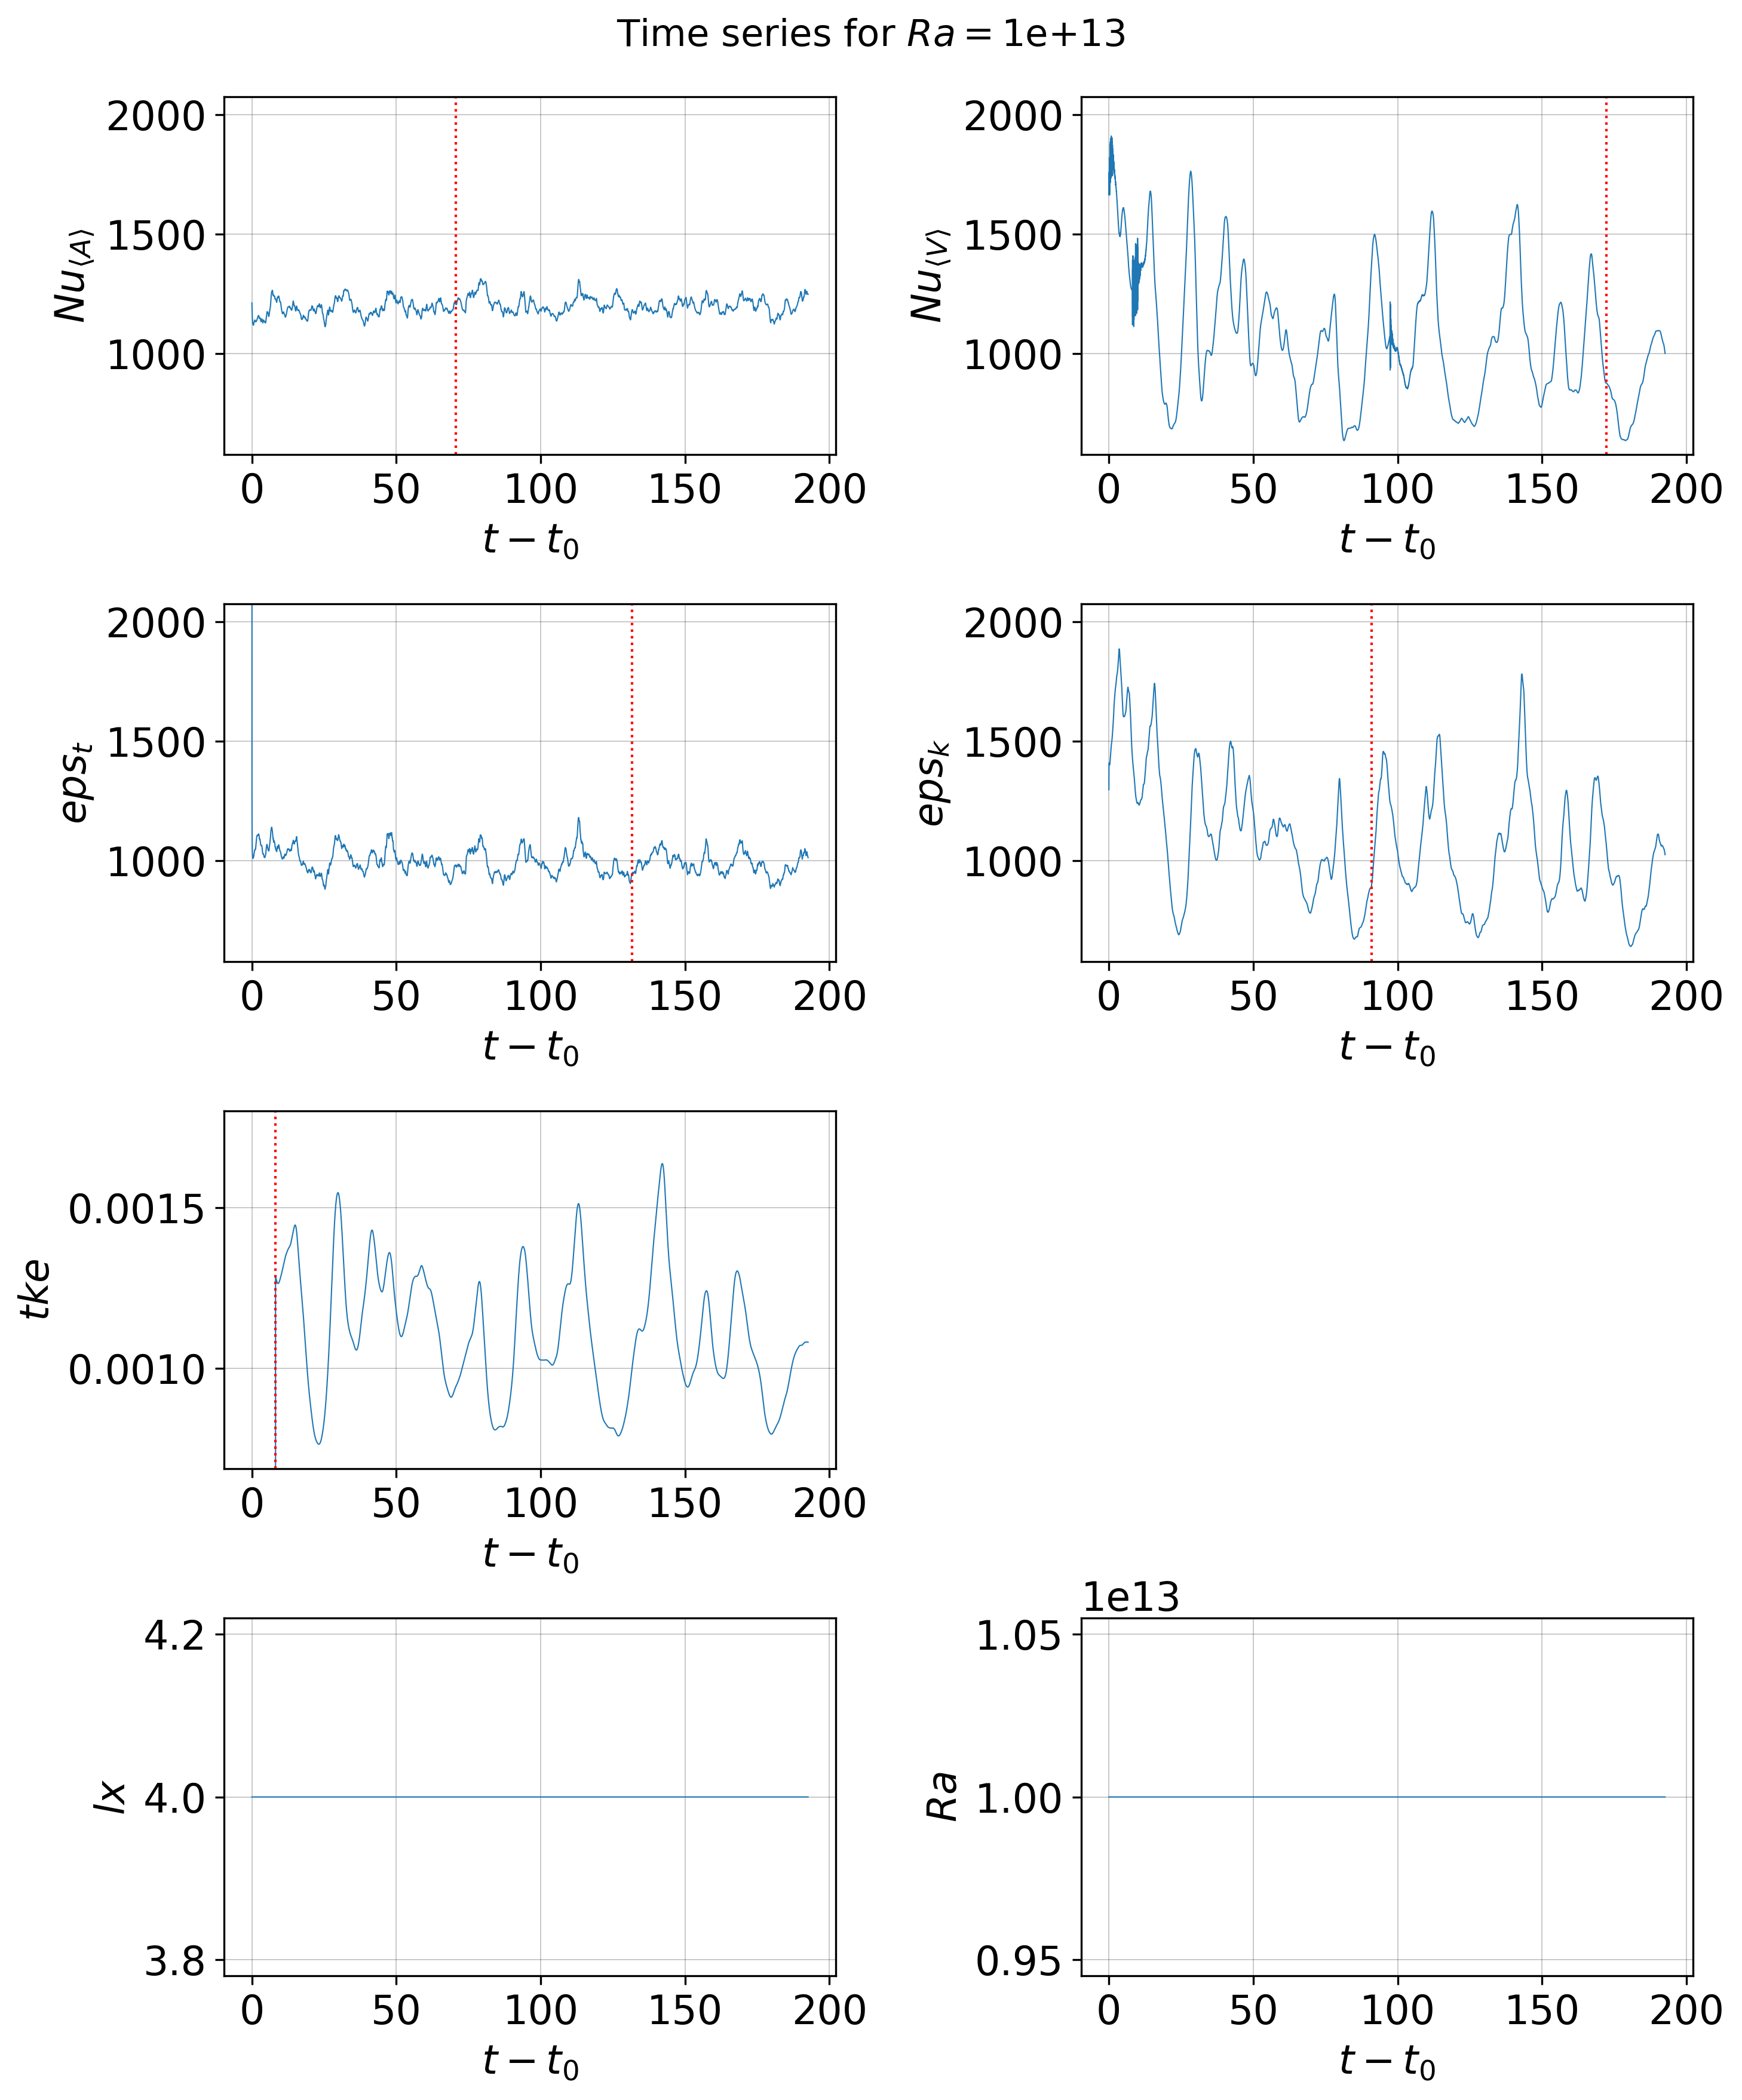

True


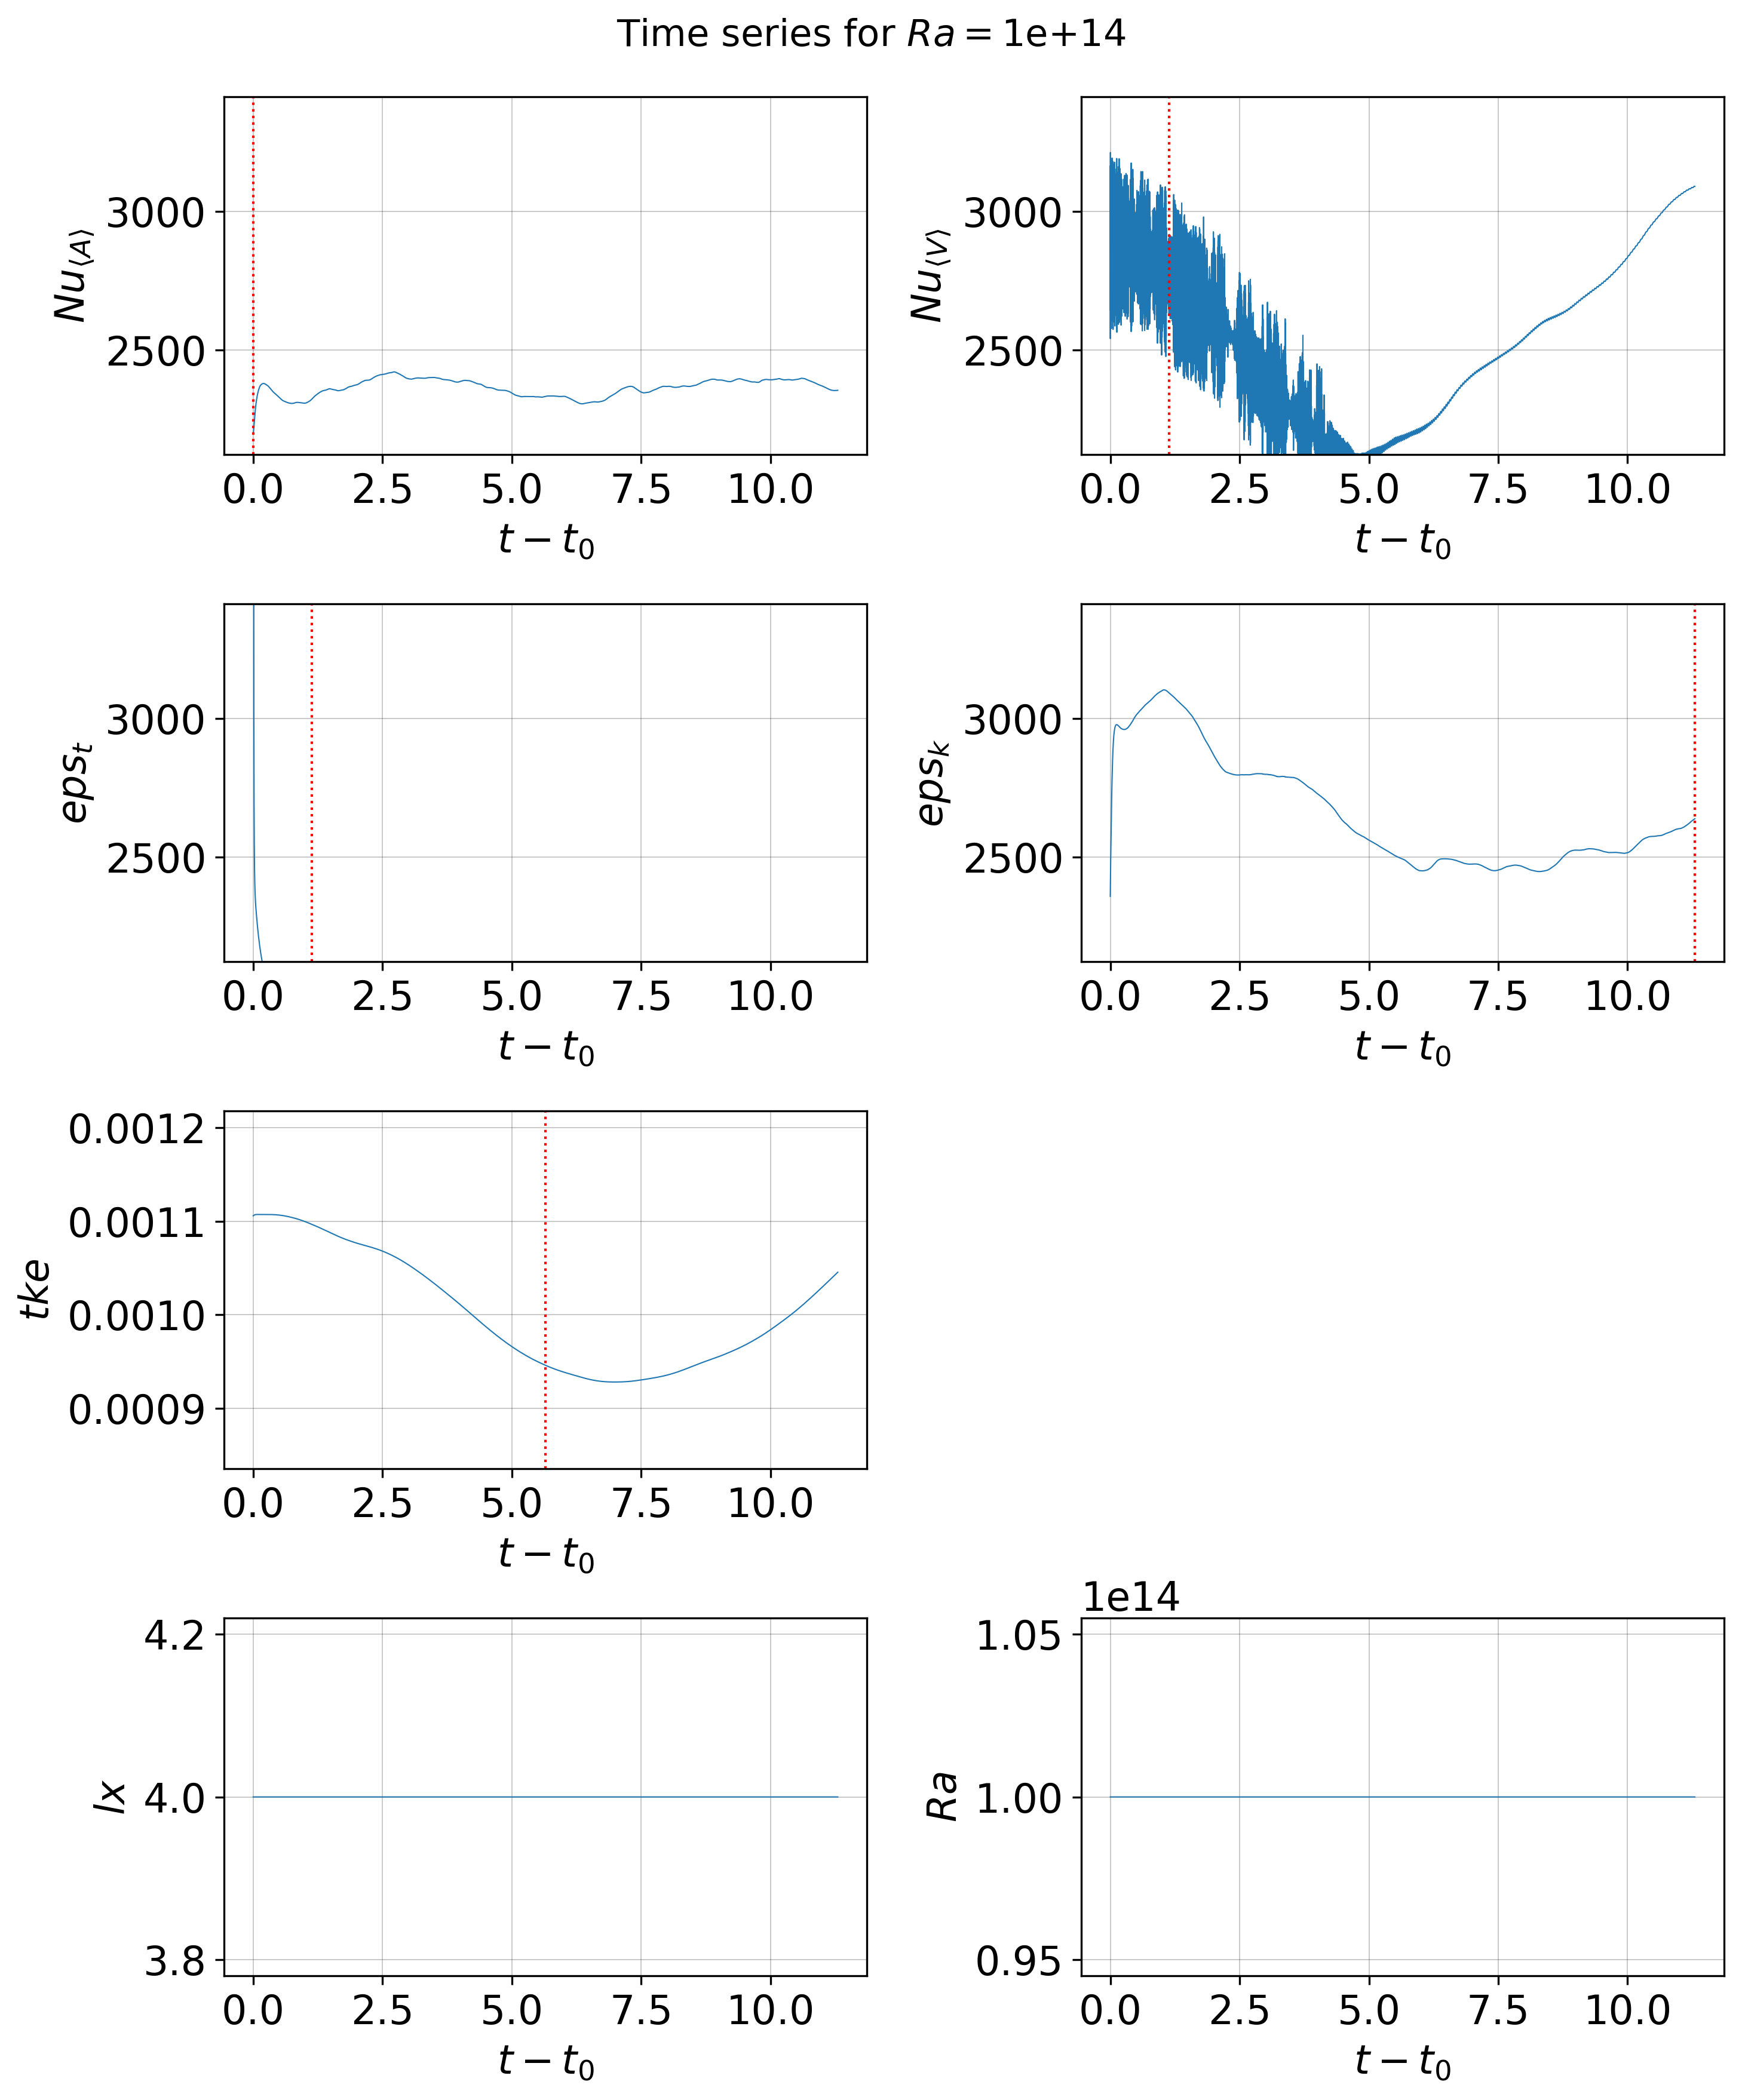

True


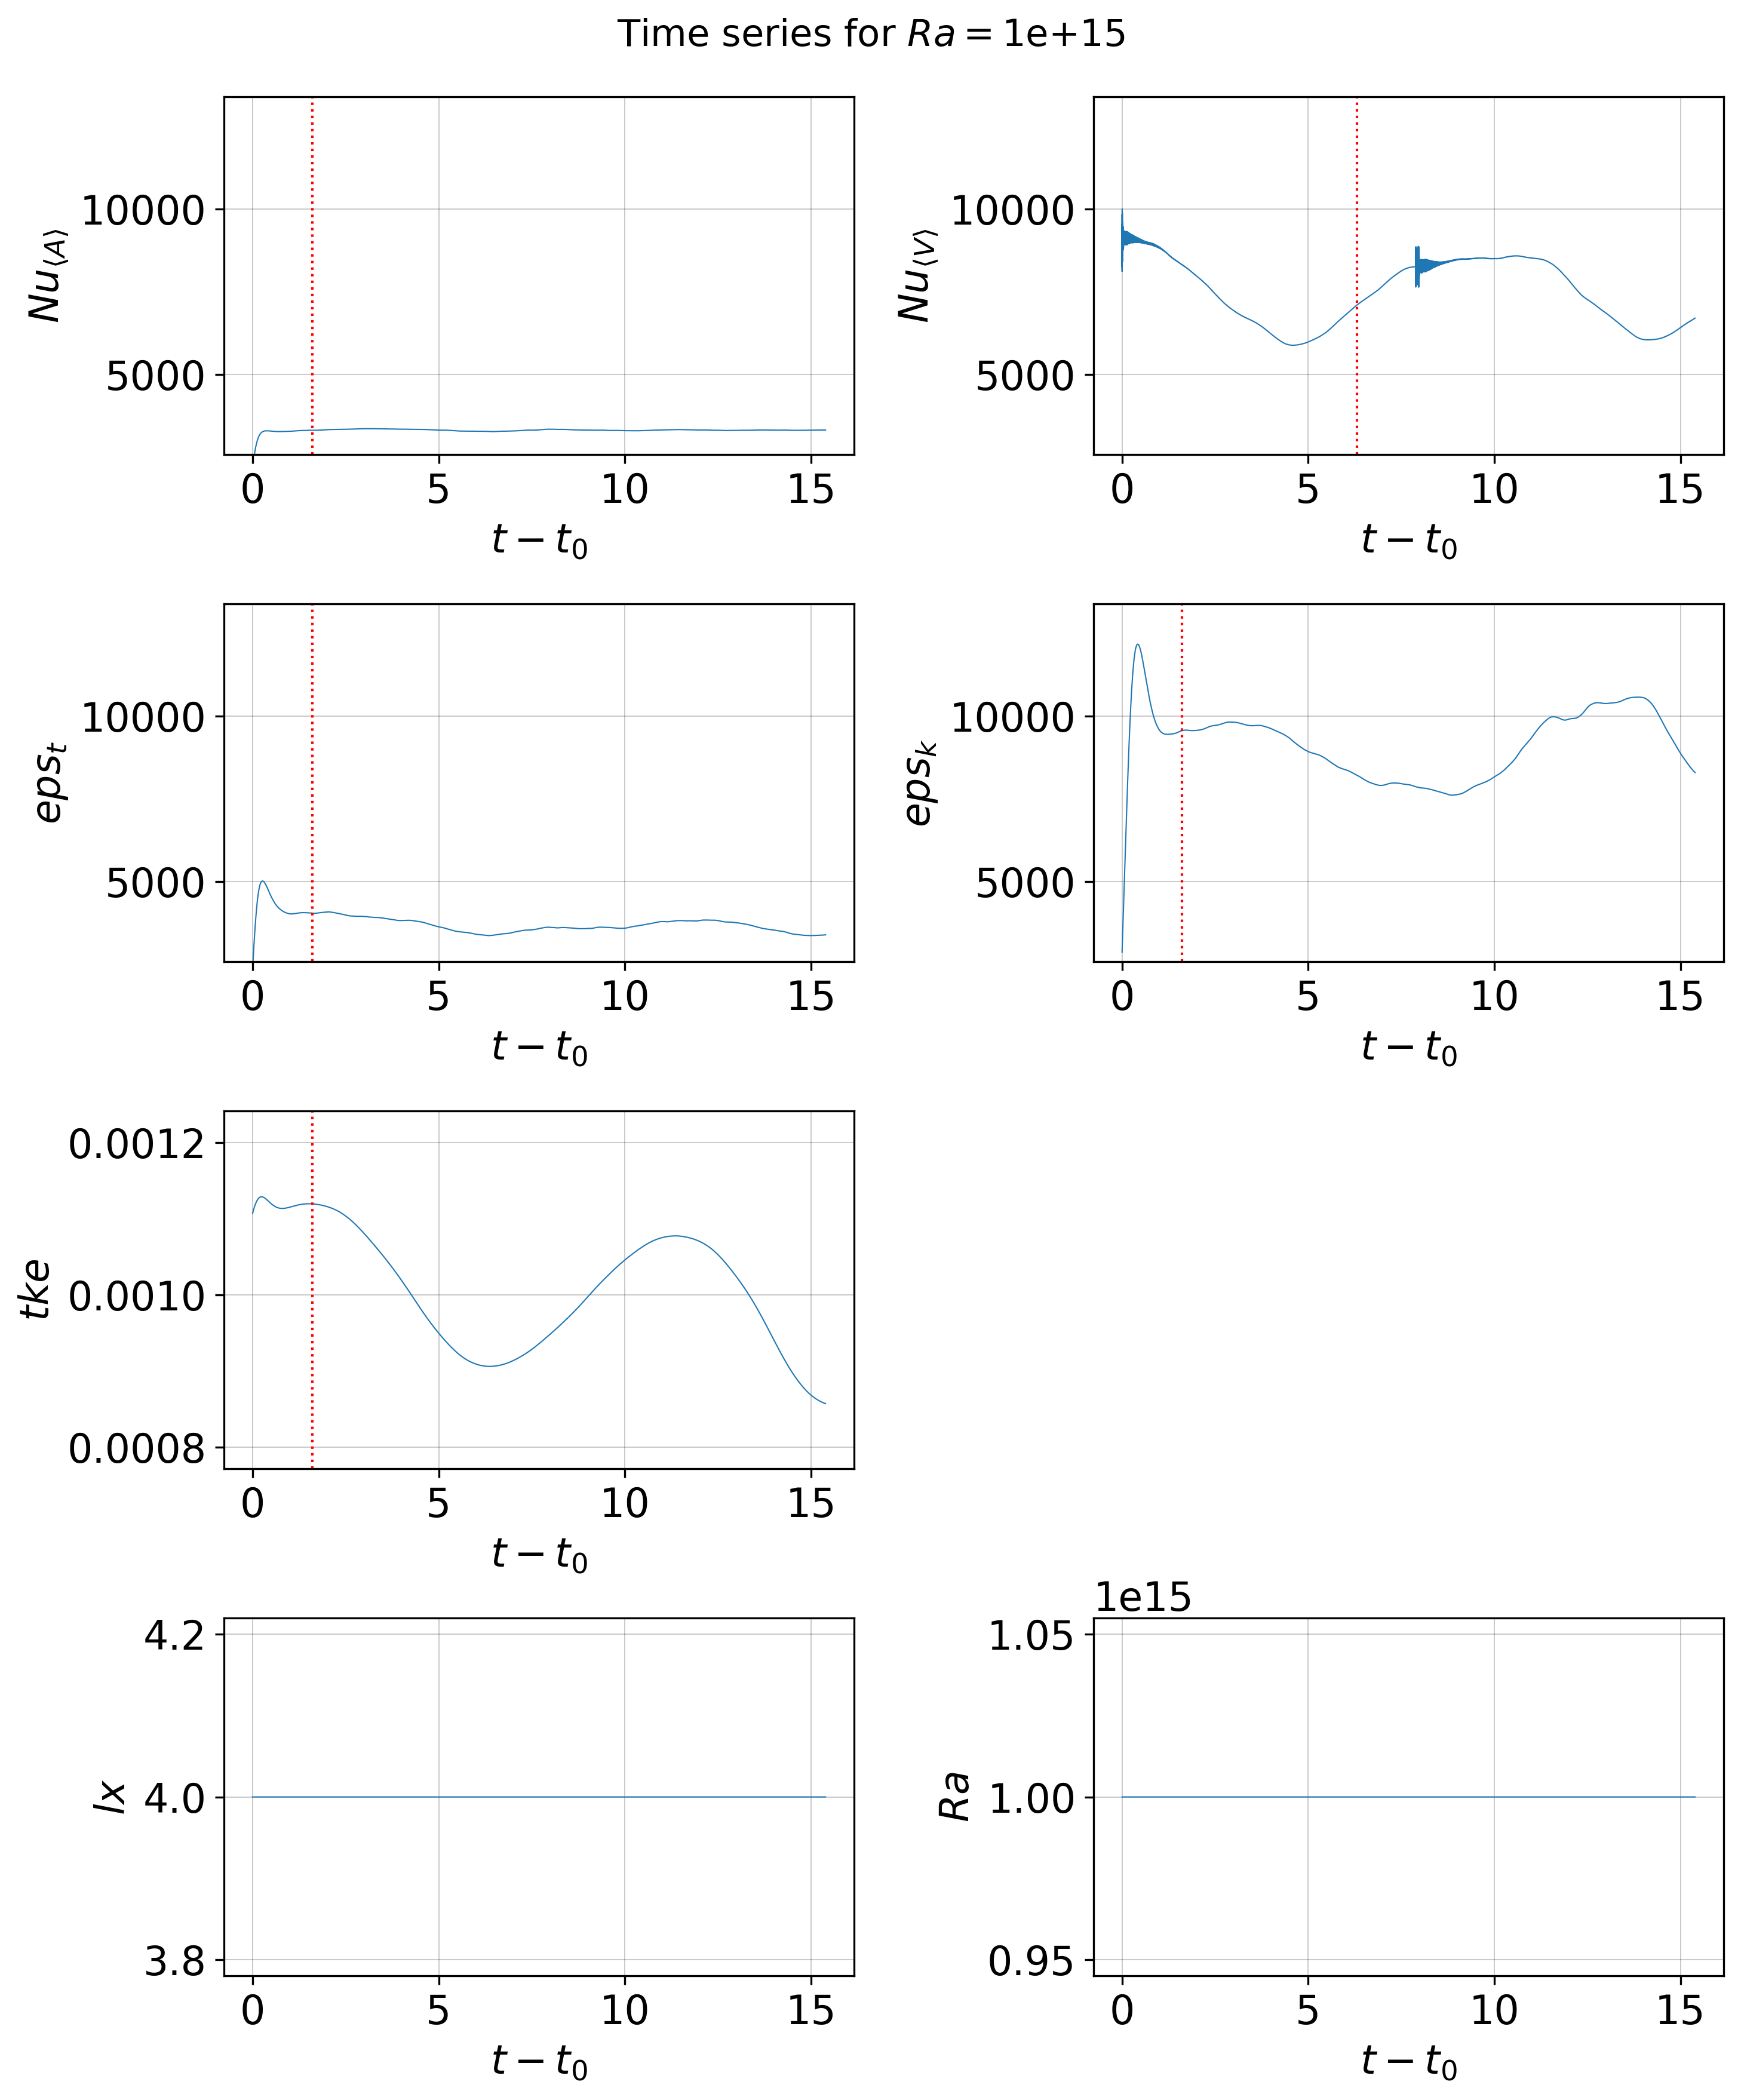

In [6]:
ts_plt.plot_ra_separate(ts_dict, check_these_rayleigh, plot_transient_end=1)

# Average the time series

## Find the optimal batch sizes

Ideally we want to have batches that are not autocorrelated among them. So we split our signal into "independent" batches.

In [7]:
for which_ra in check_these_rayleigh:
    
    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:   
        # Get uncorrelated batch size
        ts.get_uncorrelated_batch(0)

------ Now calculating for Ra = 100000000.0---------------
74042
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 18.32it/s]


[5]
111059
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 11.63it/s]


[5]
111059
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 11.62it/s]


[5]
49364
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.21it/s]


[2]
------ Now calculating for Ra = 1000000000.0---------------
283555
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:12<00:00,  4.63it/s]


[ 1  5  8 10 15 20 22 26]
252049
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.22it/s]


[ 2  6  9 12 15 18 22]
252049
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.24it/s]


[ 2  6  9 13 15 18 22]
283555
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:11<00:00,  4.67it/s]


[ 5  8 10 15 17 20 22 24 26]
------ Now calculating for Ra = 10000000000.0---------------
422779
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000 310000 315000 320000 325000 330000 335000 340000 345000 350000
 355000 360000 365000 370000 375000 380000 385000 390000 395000 400000
 405000 410000 415000 420000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:26<00:00,  3.12it/s]


[ 2  5  8 12 15 21 24 28 31 34 37 40]
375804
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000 310000 315000 320000 325000 330000 335000 340000 345000 350000
 355000 360000 365000 370000 375000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:20<00:00,  3.57it/s]


[ 2  6  8 12 16 19 21 28 33]
422779
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000 310000 315000 320000 325000 330000 335000 340000 345000 350000
 355000 360000 365000 370000 375000 380000 385000 390000 395000 400000
 405000 410000 415000 420000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:28<00:00,  2.92it/s]


[ 1  3  9 11 15 17 20 22 24 27 32 34 38]
375804
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000 235000 240000 245000 250000
 255000 260000 265000 270000 275000 280000 285000 290000 295000 300000
 305000 310000 315000 320000 325000 330000 335000 340000 345000 350000
 355000 360000 365000 370000 375000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:21<00:00,  3.45it/s]


[ 4  6 10 12 17 20 22 25 29 31 33]
------ Now calculating for Ra = 100000000000.0---------------
232034
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000 185000 190000 195000 200000
 205000 210000 215000 220000 225000 230000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:08<00:00,  5.74it/s]


[ 1  3  7 11 13 15 17 20]
180472
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:04<00:00,  7.20it/s]


[10]
180472
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000
 155000 160000 165000 170000 175000 180000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:05<00:00,  7.12it/s]


[ 2  8 10 12 15]
154691
[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000
 105000 110000 115000 120000 125000 130000 135000 140000 145000 150000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.50it/s]


[ 1  3  6  8 13]
------ Now calculating for Ra = 1000000000000.0---------------
87786
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000 75000 80000 85000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00, 15.42it/s]


[5]
87786
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000 75000 80000 85000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00, 15.63it/s]


[1 3 6]
52674
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.07it/s]


[1 3]
17562
[ 5000 10000 15000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 81.92it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
------ Now calculating for Ra = 10000000000000.0---------------
14145
[ 5000 10000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 85.30it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
84835
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000 75000 80000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 16.17it/s]


[3]
42421
[ 5000 10000 15000 20000 25000 30000 35000 40000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.77it/s]


[1]
70697
[ 5000 10000 15000 20000 25000 30000 35000 40000 45000 50000 55000 60000
 65000 70000]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 18.58it/s]


[3 5]
------ Now calculating for Ra = 100000000000000.0---------------
24216
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 57.96it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
26906
[ 5000 10000 15000 20000 25000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 52.11it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
24216
[ 5000 10000 15000 20000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 58.33it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
6
[]
Short time signal, modifying test batch sizes
the lenght of the signal is shorter than the minimun selected batch size
setting the optimal batch size to be half the length of the signal
------ Now calculating for Ra = 1000000000000000.0---------------
28025
[ 5000 10000 15000 20000 25000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 51.13it/s]

[]
Warning!
Could not find local minima for autocorrelation


Continuing with first batch size (10)
42035
[ 5000 10000 15000 20000 25000 30000 35000 40000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.09it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
42035
[ 5000 10000 15000 20000 25000 30000 35000 40000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.20it/s]


[]
Warning!
Could not find local minima for autocorrelation
Continuing with first batch size (10)
42035
[ 5000 10000 15000 20000 25000 30000 35000 40000]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.82it/s]

[2]


## Apply the NOBM to calculate the averages

In [8]:
for which_ra in check_these_rayleigh:

    print("------ Now calculating for Ra = "+repr(which_ra)+ "---------------")

    for ts in ts_dict[which_ra]:   
        # Get uncorrelated batch size
        ts.get_stats()

------ Now calculating for Ra = 100000000.0---------------
------ Now calculating for Ra = 1000000000.0---------------
------ Now calculating for Ra = 10000000000.0---------------
------ Now calculating for Ra = 100000000000.0---------------
------ Now calculating for Ra = 1000000000000.0---------------
------ Now calculating for Ra = 10000000000000.0---------------
------ Now calculating for Ra = 100000000000000.0---------------
------ Now calculating for Ra = 1000000000000000.0---------------


In [9]:
for which_ra in check_these_rayleigh:
    
    for ts in ts_dict[which_ra]:

        ra_string = '{:.0e}'.format(ts.Ra[-1])

        df = pd.DataFrame({
        "Ra="+ra_string : [""],
        "Nu": [""],
        "var": [""],
        "95% CI": [""]
        })

        new_row = {"Ra="+ra_string: "Nu_A", "Nu": ts.stats_nu_a[0], "var": ts.stats_nu_a[1], "95% CI": ts.stats_nu_a[2]}
        df.loc[0] = new_row

        new_row = {"Ra="+ra_string: "Nu_V", "Nu": ts.stats_nu_v[0], "var": ts.stats_nu_v[1], "95% CI": ts.stats_nu_v[2]}
        df.loc[1] = new_row

        new_row = {"Ra="+ra_string: "Nu_eps_t", "Nu": ts.stats_nu_eps_t[0], "var": ts.stats_nu_eps_t[1], "95% CI": ts.stats_nu_eps_t[2]}
        df.loc[2] = new_row

        new_row = {"Ra="+ra_string: "Nu_eps_k", "Nu": ts.stats_nu_eps_k[0], "var": ts.stats_nu_eps_k[1], "95% CI": ts.stats_nu_eps_k[2]}
        df.loc[3] = new_row
        
        display(df)

Ra=1e+08         Nu       var    95% CI
0      Nu_A  23.971017   0.00001  0.006046
1      Nu_V  23.989871  0.000002  0.002731
2  Nu_eps_t  23.986373  0.000005  0.004174
3  Nu_eps_k  23.989415       0.0  0.000457

Ra=1e+09         Nu       var    95% CI
0      Nu_A  57.357672  0.271812  1.021858
1      Nu_V  57.620866  1.256736  2.197243
2  Nu_eps_t  57.785779  0.444399  1.306599
3  Nu_eps_k  57.580044  0.943435   1.90376

Ra=1e+10          Nu       var    95% CI
0      Nu_A   106.07841   0.22406  0.927767
1      Nu_V  106.737096  1.094108  2.050152
2  Nu_eps_t  106.721467  0.467224  1.339734
3  Nu_eps_k  106.745525  0.659894  1.592184

Ra=1e+11          Nu        var     95% CI
0      Nu_A  233.060259  35.956714  11.752928
1      Nu_V  228.493696  39.355772  12.295899
2  Nu_eps_t  226.141206   4.435176   4.127732
3  Nu_eps_k  224.610139  50.351194  13.907881

Ra=1e+12          Nu         var     95% CI
0      Nu_A  483.333061   40.794709  12.518664
1      Nu_V  478.195448  361.520358   37.26683
2  Nu_eps_t  490.123685  129.712583  22.322721
3  Nu_eps_k  402.529517  104.948043  20.079054

Ra=1e+13           Nu          var     95% CI
0      Nu_A   1204.16563    18.577566   8.447933
1      Nu_V   856.318909   374.989534  37.954707
2  Nu_eps_t   986.442451   137.305618  22.966786
3  Nu_eps_k  1025.537479  1286.435809  70.299159

Ra=1e+14           Nu          var      95% CI
0      Nu_A  2365.150481   123.522299   21.783555
1      Nu_V  2497.797344  8106.177771  176.467256
2  Nu_eps_t   1998.62813   922.239929   59.522071
3  Nu_eps_k  2638.358201     0.002267    0.093319

Ra=1e+15           Nu            var      95% CI
0      Nu_A  3328.142929      30.217987   10.774294
1      Nu_V  7633.068262  115967.771262  667.459205
2  Nu_eps_t  3678.322013    3566.115699  117.045248
3  Nu_eps_k  9082.538629  124944.958083   692.81206

# Draw an scaling Plot

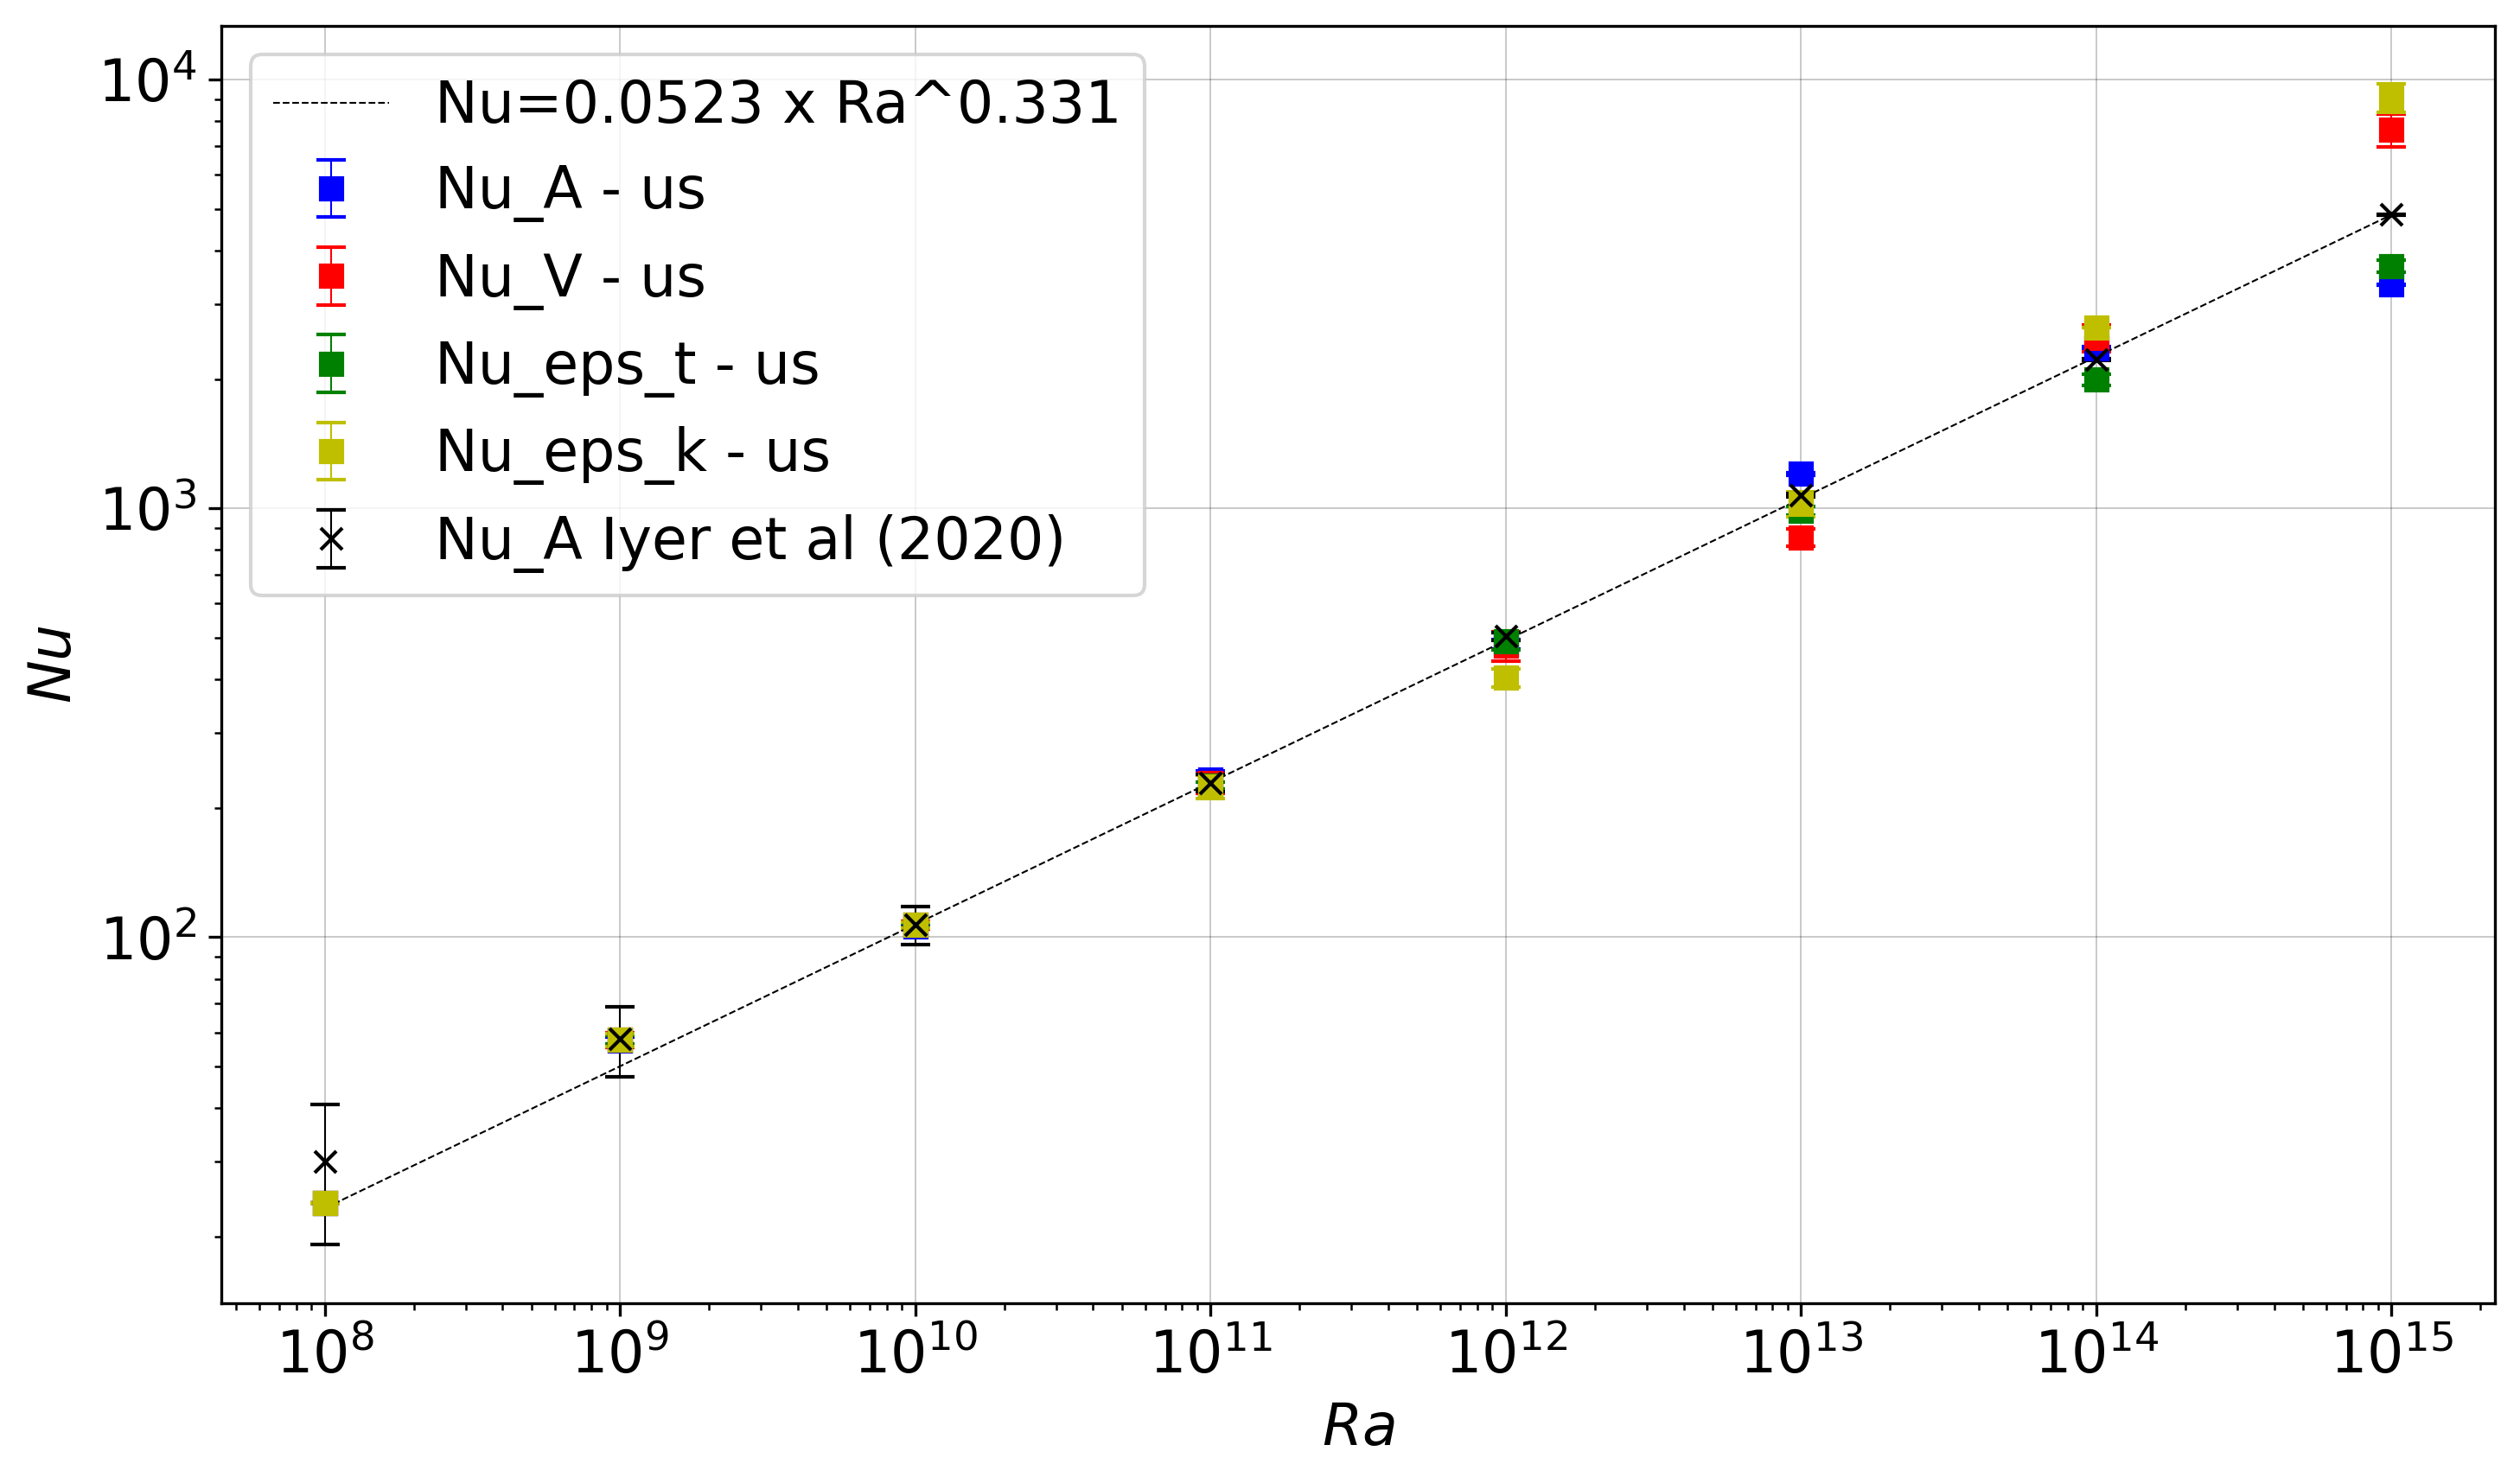

In [10]:
rcParams["errorbar.capsize"] = 4

fig, ax = plt.subplots(1, 1,figsize=(10, 6), dpi=300)

lab = 0
for which_ra in check_these_rayleigh:
    for ts in [ts_dict[which_ra][0]]:
        if ts.stats_nu_a[0] > 10:
            if lab ==0:     
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b', label = "Nu_A - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r', label = "Nu_V - us")

                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g', label = "Nu_eps_t - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y', label = "Nu_eps_k - us")

            else:
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b')
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y')


            lab +=1

#Plot data by jorg
ra_j = [1e8,1e9,1e10,1e11, 1e12, 1e13, 1e14, 1e15]
nu_j = [29.94,58,107,229, 503, 1075, 2228, 4845]
nu_e_j = [0.04, 10, 11, 13, 25, 44, 100, 200]
ax.errorbar(ra_j, nu_j, yerr=ts.stats_nu_a[2], fmt = 'x', color = 'k' , label = "Nu_A Iyer et al (2020)")

# Plot scaling line
ra_x=np.linspace(1e8,1e15, 1000)
nu_x=0.0525*ra_x**(0.331)

ax.plot(ra_x,nu_x, "--k", label="Nu=0.0523 x Ra^0.331")

ax.set_xlabel(r'$Ra$')
ax.set_ylabel(r'$Nu$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color = 'black', linestyle = '-', linewidth = 0.1)
plt.tight_layout()
plt.legend()
#plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()

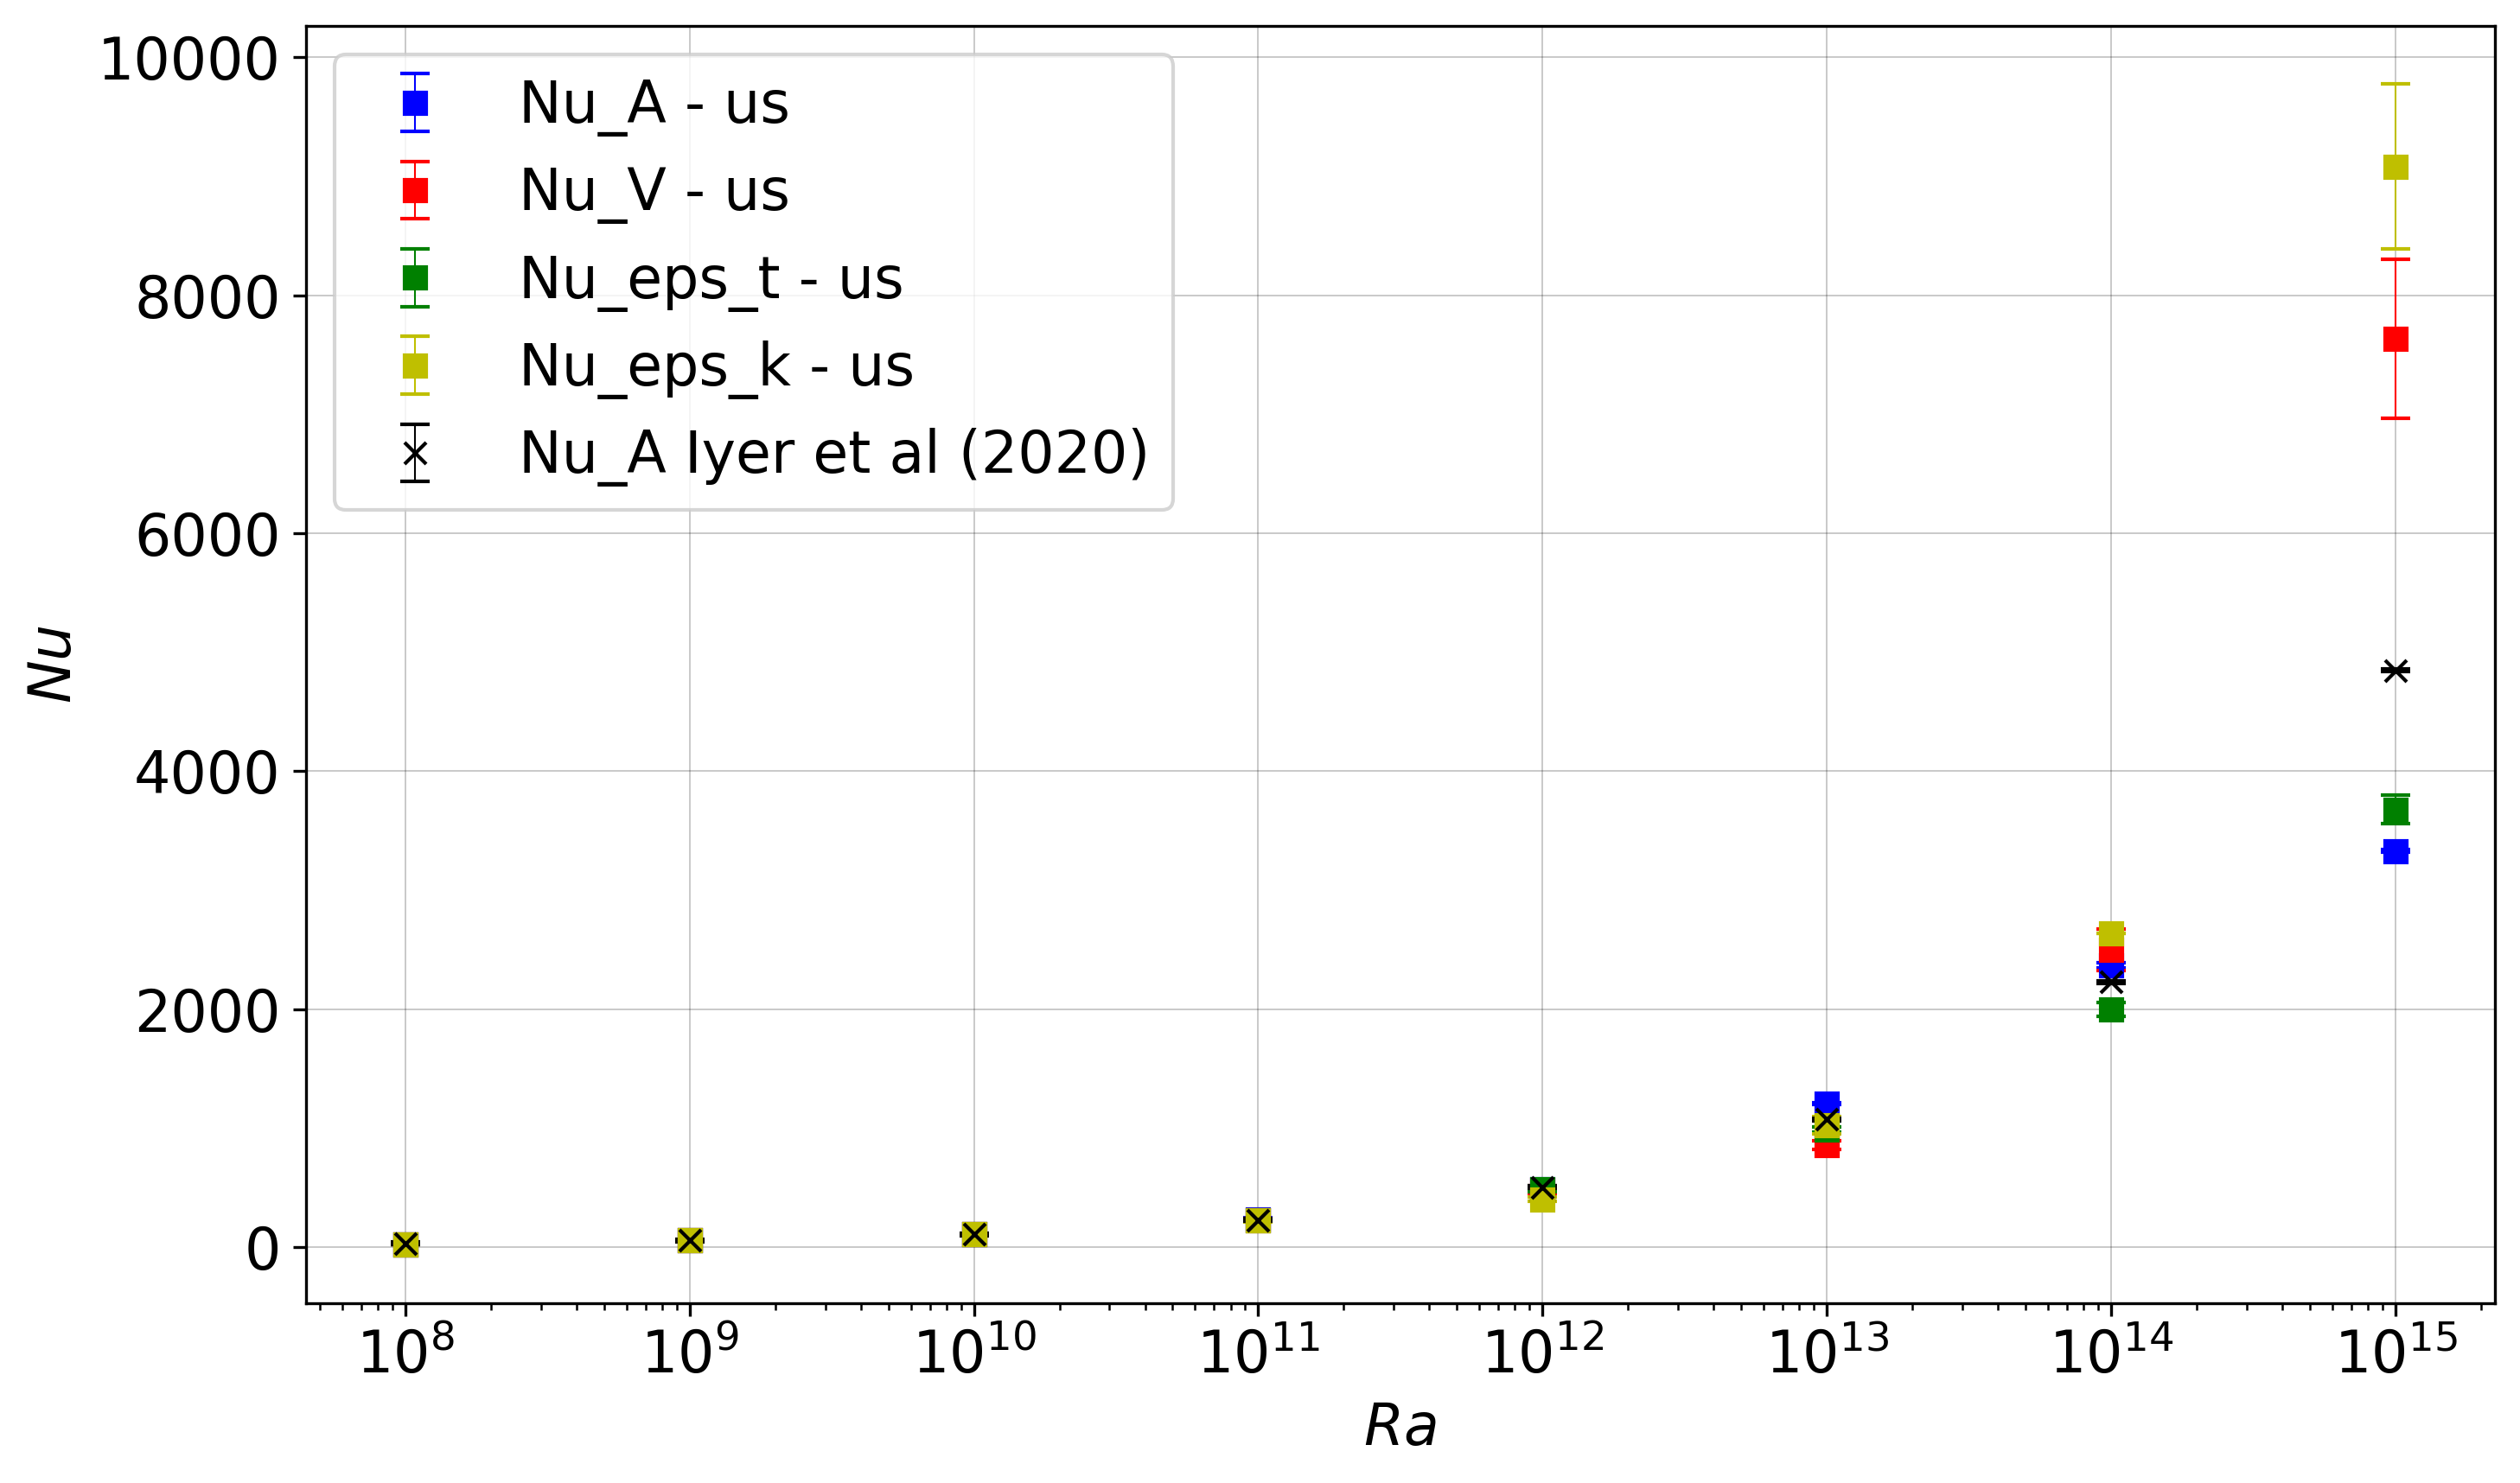

In [11]:
rcParams["errorbar.capsize"] = 4

fig, ax = plt.subplots(1, 1,figsize=(10, 6), dpi=300)

lab = 0
for which_ra in check_these_rayleigh:
    for ts in [ts_dict[which_ra][0]]:
        if ts.stats_nu_a[0] > 10:
            if lab ==0:     
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b', label = "Nu_A - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r', label = "Nu_V - us")

                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g', label = "Nu_eps_t - us")
                
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y', label = "Nu_eps_k - us")

            else:
                ax.errorbar(ts.Ra[0], ts.stats_nu_a[0], yerr=ts.stats_nu_a[2], fmt = 's', color = 'b')
                ax.errorbar(ts.Ra[0], ts.stats_nu_v[0], yerr=ts.stats_nu_v[2], fmt = 's', color = 'r')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_t[0], yerr=ts.stats_nu_eps_t[2], fmt = 's', color = 'g')
                ax.errorbar(ts.Ra[0], ts.stats_nu_eps_k[0], yerr=ts.stats_nu_eps_k[2], fmt = 's', color = 'y')


            lab +=1

#Plot data by jorg
ra_j = [1e8,1e9,1e10,1e11, 1e12, 1e13, 1e14, 1e15]
nu_j = [29.94,58,107,229, 503, 1075, 2228, 4845]
nu_e_j = [0.04, 10, 11, 13, 25, 44, 100, 200]
ax.errorbar(ra_j, nu_j, yerr=ts.stats_nu_a[2], fmt = 'x', color = 'k' , label = "Nu_A Iyer et al (2020)")

# Plot scaling line
ra_x=np.linspace(1e8,1e15, 1000)
nu_x=0.0525*ra_x**(0.331)

#ax.plot(ra_x,nu_x, "--k", label="Nu=0.0523 x Ra^0.331")

ax.set_xlabel(r'$Ra$')
ax.set_ylabel(r'$Nu$')

#ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color = 'black', linestyle = '-', linewidth = 0.1)
plt.tight_layout()
plt.legend()
#plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()